In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
# 데이터 불러오기
df_train = pd.read_csv("src/data/train.csv") 
df_test = pd.read_csv("src/data/test.csv")

# 결측치 제거
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

# x와 y분류
x = df_train.drop(['ID', 'Y_LABEL'], axis=1)
y = df_train['Y_LABEL']

# test데이터에서 ID값 제거
df_test = df_test.drop(['ID'], axis = 1)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
le = LabelEncoder()

# 변수 정규화
def get_values(value):
  return value.values.reshape(-1, 1)

categorical_features = ['COMPONENT_ARBITRARY','YEAR']
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

for col in x:
  if col not in categorical_features:
    x_train[col] = scaler.fit_transform(get_values(x_train[col]))
    x_valid[col] = scaler.transform(get_values(x_valid[col]))
    if col in df_test.columns:
        df_test[col] = scaler.transform(get_values(df_test[col]))

for col in categorical_features:
  x_train[col] = le.fit_transform(x_train[col])
  x_valid[col] = le.transform(x_valid[col])
  if col in df_test.columns:
      df_test[col] = le.transform(df_test[col])

C:\Users\User\AppData\Local\Temp\ipykernel_32676\1051974734.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = scaler.fit_transform(get_values(x_train[col]))
C:\Users\User\AppData\Local\Temp\ipykernel_32676\1051974734.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_valid[col] = scaler.transform(get_values(x_valid[col]))
C:\Users\User\AppData\Local\Temp\ipykernel_32676\1051974734.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [3]:
# Xgboost 이진분류 모델 gridCV로 파라미터 튜닝
params = {'n_estimators': [100,200,400,600,800,1000],
        'max_depth' : [3,4,6,8,10,12],
        'eta' : [0.1], 
        'objective' : ['binary:logistic']}

model = XGBClassifier()
model_grid = GridSearchCV(model, param_grid=params, cv=3)
model_grid.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])

[0]	validation_0-auc:0.81508
[1]	validation_0-auc:0.81511
[2]	validation_0-auc:0.81512
[3]	validation_0-auc:0.83537
[4]	validation_0-auc:0.83536
[5]	validation_0-auc:0.84221
[6]	validation_0-auc:0.84228
[7]	validation_0-auc:0.85956
[8]	validation_0-auc:0.85932
[9]	validation_0-auc:0.85946
[10]	validation_0-auc:0.85869
[11]	validation_0-auc:0.85832
[12]	validation_0-auc:0.86061
[13]	validation_0-auc:0.86073
[14]	validation_0-auc:0.87412
[15]	validation_0-auc:0.87257
[16]	validation_0-auc:0.87272
[17]	validation_0-auc:0.87406
[18]	validation_0-auc:0.87620
[19]	validation_0-auc:0.87550
[20]	validation_0-auc:0.87219
[21]	validation_0-auc:0.87298
[22]	validation_0-auc:0.87242
[23]	validation_0-auc:0.87325
[24]	validation_0-auc:0.87146
[25]	validation_0-auc:0.87050
[26]	validation_0-auc:0.87044
[27]	validation_0-auc:0.86988
[28]	validation_0-auc:0.87074
[29]	validation_0-auc:0.87229
[30]	validation_0-auc:0.87336
[31]	validation_0-auc:0.87539
[32]	validation_0-auc:0.87684
[33]	validation_0-au

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-auc:0.88192
[39]	validation_0-auc:0.88214
[40]	validation_0-auc:0.88213
[41]	validation_0-auc:0.88168
[42]	validation_0-auc:0.88205
[43]	validation_0-auc:0.88198
[44]	validation_0-auc:0.88162
[45]	validation_0-auc:0.88177
[46]	validation_0-auc:0.88203
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88193
[49]	validation_0-auc:0.88192
[50]	validation_0-auc:0.88113
[51]	validation_0-auc:0.88114
[52]	validation_0-auc:0.88211
[53]	validation_0-auc:0.88161
[54]	validation_0-auc:0.88201
[55]	validation_0-auc:0.88201
[56]	validation_0-auc:0.88245
[57]	validation_0-auc:0.88264
[58]	validation_0-auc:0.88254
[59]	validation_0-auc:0.88238
[60]	validation_0-auc:0.88254
[61]	validation_0-auc:0.88218
[62]	validation_0-auc:0.88237
[63]	validation_0-auc:0.88235
[64]	validation_0-auc:0.88248
[65]	validation_0-auc:0.88259
[66]	validation_0-auc:0.88324
[67]	validation_0-auc:0.88302
[68]	validation_0-auc:0.88387
[69]	validation_0-auc:0.88414
[70]	validation_0-auc:0.88469
[71]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-auc:0.88191
[41]	validation_0-auc:0.88167
[42]	validation_0-auc:0.88223
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88238
[45]	validation_0-auc:0.88299
[46]	validation_0-auc:0.88341
[47]	validation_0-auc:0.88518
[48]	validation_0-auc:0.88522
[49]	validation_0-auc:0.88536
[50]	validation_0-auc:0.88582
[51]	validation_0-auc:0.88547
[52]	validation_0-auc:0.88663
[53]	validation_0-auc:0.88807
[54]	validation_0-auc:0.88839
[55]	validation_0-auc:0.88712
[56]	validation_0-auc:0.88720
[57]	validation_0-auc:0.88682
[58]	validation_0-auc:0.88693
[59]	validation_0-auc:0.88691
[60]	validation_0-auc:0.88790
[61]	validation_0-auc:0.88768
[62]	validation_0-auc:0.88746
[63]	validation_0-auc:0.88610
[64]	validation_0-auc:0.88605
[65]	validation_0-auc:0.88619
[66]	validation_0-auc:0.88661
[67]	validation_0-auc:0.88578
[68]	validation_0-auc:0.88605
[69]	validation_0-auc:0.88620
[70]	validation_0-auc:0.88626
[71]	validation_0-auc:0.88614
[72]	validation_0-auc:0.88633
[73]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-auc:0.88252
[42]	validation_0-auc:0.88264
[43]	validation_0-auc:0.88294
[44]	validation_0-auc:0.88327
[45]	validation_0-auc:0.88305
[46]	validation_0-auc:0.88305
[47]	validation_0-auc:0.88236
[48]	validation_0-auc:0.88192
[49]	validation_0-auc:0.88160
[50]	validation_0-auc:0.88168
[51]	validation_0-auc:0.88171
[52]	validation_0-auc:0.88126
[53]	validation_0-auc:0.88151
[54]	validation_0-auc:0.88154
[55]	validation_0-auc:0.88216
[56]	validation_0-auc:0.88254
[57]	validation_0-auc:0.88306
[58]	validation_0-auc:0.88314
[59]	validation_0-auc:0.88323
[60]	validation_0-auc:0.88285
[61]	validation_0-auc:0.88286
[62]	validation_0-auc:0.88373
[63]	validation_0-auc:0.88387
[64]	validation_0-auc:0.88301
[65]	validation_0-auc:0.88388
[66]	validation_0-auc:0.88428
[67]	validation_0-auc:0.88402
[68]	validation_0-auc:0.88391
[69]	validation_0-auc:0.88410
[70]	validation_0-auc:0.88488
[71]	validation_0-auc:0.88492
[72]	validation_0-auc:0.88491
[73]	validation_0-auc:0.88512
[74]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-auc:0.88192
[39]	validation_0-auc:0.88214
[40]	validation_0-auc:0.88213
[41]	validation_0-auc:0.88168
[42]	validation_0-auc:0.88205
[43]	validation_0-auc:0.88198
[44]	validation_0-auc:0.88162
[45]	validation_0-auc:0.88177
[46]	validation_0-auc:0.88203
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88193
[49]	validation_0-auc:0.88192
[50]	validation_0-auc:0.88113
[51]	validation_0-auc:0.88114
[52]	validation_0-auc:0.88211
[53]	validation_0-auc:0.88161
[54]	validation_0-auc:0.88201
[55]	validation_0-auc:0.88201
[56]	validation_0-auc:0.88245
[57]	validation_0-auc:0.88264
[58]	validation_0-auc:0.88254
[59]	validation_0-auc:0.88238
[60]	validation_0-auc:0.88254
[61]	validation_0-auc:0.88218
[62]	validation_0-auc:0.88237
[63]	validation_0-auc:0.88235
[64]	validation_0-auc:0.88248
[65]	validation_0-auc:0.88259
[66]	validation_0-auc:0.88324
[67]	validation_0-auc:0.88302
[68]	validation_0-auc:0.88387
[69]	validation_0-auc:0.88414
[70]	validation_0-auc:0.88469
[71]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-auc:0.88157
[39]	validation_0-auc:0.88225
[40]	validation_0-auc:0.88191
[41]	validation_0-auc:0.88167
[42]	validation_0-auc:0.88223
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88238
[45]	validation_0-auc:0.88299
[46]	validation_0-auc:0.88341
[47]	validation_0-auc:0.88518
[48]	validation_0-auc:0.88522
[49]	validation_0-auc:0.88536
[50]	validation_0-auc:0.88582
[51]	validation_0-auc:0.88547
[52]	validation_0-auc:0.88663
[53]	validation_0-auc:0.88807
[54]	validation_0-auc:0.88839
[55]	validation_0-auc:0.88712
[56]	validation_0-auc:0.88720
[57]	validation_0-auc:0.88682
[58]	validation_0-auc:0.88693
[59]	validation_0-auc:0.88691
[60]	validation_0-auc:0.88790
[61]	validation_0-auc:0.88768
[62]	validation_0-auc:0.88746
[63]	validation_0-auc:0.88610
[64]	validation_0-auc:0.88605
[65]	validation_0-auc:0.88619
[66]	validation_0-auc:0.88661
[67]	validation_0-auc:0.88578
[68]	validation_0-auc:0.88605
[69]	validation_0-auc:0.88620
[70]	validation_0-auc:0.88626
[71]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-auc:0.88249
[41]	validation_0-auc:0.88252
[42]	validation_0-auc:0.88264
[43]	validation_0-auc:0.88294
[44]	validation_0-auc:0.88327
[45]	validation_0-auc:0.88305
[46]	validation_0-auc:0.88305
[47]	validation_0-auc:0.88236
[48]	validation_0-auc:0.88192
[49]	validation_0-auc:0.88160
[50]	validation_0-auc:0.88168
[51]	validation_0-auc:0.88171
[52]	validation_0-auc:0.88126
[53]	validation_0-auc:0.88151
[54]	validation_0-auc:0.88154
[55]	validation_0-auc:0.88216
[56]	validation_0-auc:0.88254
[57]	validation_0-auc:0.88306
[58]	validation_0-auc:0.88314
[59]	validation_0-auc:0.88323
[60]	validation_0-auc:0.88285
[61]	validation_0-auc:0.88286
[62]	validation_0-auc:0.88373
[63]	validation_0-auc:0.88387
[64]	validation_0-auc:0.88301
[65]	validation_0-auc:0.88388
[66]	validation_0-auc:0.88428
[67]	validation_0-auc:0.88402
[68]	validation_0-auc:0.88391
[69]	validation_0-auc:0.88410
[70]	validation_0-auc:0.88488
[71]	validation_0-auc:0.88492
[72]	validation_0-auc:0.88491
[73]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87242
[23]	validation_0-auc:0.87325
[24]	validation_0-auc:0.87146
[25]	validation_0-auc:0.87050
[26]	validation_0-auc:0.87044
[27]	validation_0-auc:0.86988
[28]	validation_0-auc:0.87074
[29]	validation_0-auc:0.87229
[30]	validation_0-auc:0.87336
[31]	validation_0-auc:0.87539
[32]	validation_0-auc:0.87684
[33]	validation_0-auc:0.87665
[34]	validation_0-auc:0.87799
[35]	validation_0-auc:0.87873
[36]	validation_0-auc:0.88000
[37]	validation_0-auc:0.88065
[38]	validation_0-auc:0.88192
[39]	validation_0-auc:0.88214
[40]	validation_0-auc:0.88213
[41]	validation_0-auc:0.88168
[42]	validation_0-auc:0.88205
[43]	validation_0-auc:0.88198
[44]	validation_0-auc:0.88162
[45]	validation_0-auc:0.88177
[46]	validation_0-auc:0.88203
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88193
[49]	validation_0-auc:0.88192
[50]	validation_0-auc:0.88113
[51]	validation_0-auc:0.88114
[52]	validation_0-auc:0.88211
[53]	validation_0-auc:0.88161
[54]	validation_0-auc:0.88201
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.86689
[22]	validation_0-auc:0.86898
[23]	validation_0-auc:0.86770
[24]	validation_0-auc:0.86762
[25]	validation_0-auc:0.86821
[26]	validation_0-auc:0.86834
[27]	validation_0-auc:0.87004
[28]	validation_0-auc:0.87050
[29]	validation_0-auc:0.87436
[30]	validation_0-auc:0.87451
[31]	validation_0-auc:0.87868
[32]	validation_0-auc:0.87868
[33]	validation_0-auc:0.87765
[34]	validation_0-auc:0.87842
[35]	validation_0-auc:0.88031
[36]	validation_0-auc:0.87949
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88157
[39]	validation_0-auc:0.88225
[40]	validation_0-auc:0.88191
[41]	validation_0-auc:0.88167
[42]	validation_0-auc:0.88223
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88238
[45]	validation_0-auc:0.88299
[46]	validation_0-auc:0.88341
[47]	validation_0-auc:0.88518
[48]	validation_0-auc:0.88522
[49]	validation_0-auc:0.88536
[50]	validation_0-auc:0.88582
[51]	validation_0-auc:0.88547
[52]	validation_0-auc:0.88663
[53]	validation_0-auc:0.88807
[54]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.85855
[21]	validation_0-auc:0.86235
[22]	validation_0-auc:0.86233
[23]	validation_0-auc:0.86339
[24]	validation_0-auc:0.86765
[25]	validation_0-auc:0.86745
[26]	validation_0-auc:0.86899
[27]	validation_0-auc:0.86897
[28]	validation_0-auc:0.86883
[29]	validation_0-auc:0.87379
[30]	validation_0-auc:0.87550
[31]	validation_0-auc:0.87644
[32]	validation_0-auc:0.87634
[33]	validation_0-auc:0.87675
[34]	validation_0-auc:0.87899
[35]	validation_0-auc:0.87939
[36]	validation_0-auc:0.87915
[37]	validation_0-auc:0.87963
[38]	validation_0-auc:0.88061
[39]	validation_0-auc:0.88128
[40]	validation_0-auc:0.88249
[41]	validation_0-auc:0.88252
[42]	validation_0-auc:0.88264
[43]	validation_0-auc:0.88294
[44]	validation_0-auc:0.88327
[45]	validation_0-auc:0.88305
[46]	validation_0-auc:0.88305
[47]	validation_0-auc:0.88236
[48]	validation_0-auc:0.88192
[49]	validation_0-auc:0.88160
[50]	validation_0-auc:0.88168
[51]	validation_0-auc:0.88171
[52]	validation_0-auc:0.88126
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-auc:0.87229
[30]	validation_0-auc:0.87336
[31]	validation_0-auc:0.87539
[32]	validation_0-auc:0.87684
[33]	validation_0-auc:0.87665
[34]	validation_0-auc:0.87799
[35]	validation_0-auc:0.87873
[36]	validation_0-auc:0.88000
[37]	validation_0-auc:0.88065
[38]	validation_0-auc:0.88192
[39]	validation_0-auc:0.88214
[40]	validation_0-auc:0.88213
[41]	validation_0-auc:0.88168
[42]	validation_0-auc:0.88205
[43]	validation_0-auc:0.88198
[44]	validation_0-auc:0.88162
[45]	validation_0-auc:0.88177
[46]	validation_0-auc:0.88203
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88193
[49]	validation_0-auc:0.88192
[50]	validation_0-auc:0.88113
[51]	validation_0-auc:0.88114
[52]	validation_0-auc:0.88211
[53]	validation_0-auc:0.88161
[54]	validation_0-auc:0.88201
[55]	validation_0-auc:0.88201
[56]	validation_0-auc:0.88245
[57]	validation_0-auc:0.88264
[58]	validation_0-auc:0.88254
[59]	validation_0-auc:0.88238
[60]	validation_0-auc:0.88254
[61]	validation_0-auc:0.88218
[62]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87868
[32]	validation_0-auc:0.87868
[33]	validation_0-auc:0.87765
[34]	validation_0-auc:0.87842
[35]	validation_0-auc:0.88031
[36]	validation_0-auc:0.87949
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88157
[39]	validation_0-auc:0.88225
[40]	validation_0-auc:0.88191
[41]	validation_0-auc:0.88167
[42]	validation_0-auc:0.88223
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88238
[45]	validation_0-auc:0.88299
[46]	validation_0-auc:0.88341
[47]	validation_0-auc:0.88518
[48]	validation_0-auc:0.88522
[49]	validation_0-auc:0.88536
[50]	validation_0-auc:0.88582
[51]	validation_0-auc:0.88547
[52]	validation_0-auc:0.88663
[53]	validation_0-auc:0.88807
[54]	validation_0-auc:0.88839
[55]	validation_0-auc:0.88712
[56]	validation_0-auc:0.88720
[57]	validation_0-auc:0.88682
[58]	validation_0-auc:0.88693
[59]	validation_0-auc:0.88691
[60]	validation_0-auc:0.88790
[61]	validation_0-auc:0.88768
[62]	validation_0-auc:0.88746
[63]	validation_0-auc:0.88610
[64]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.87550
[31]	validation_0-auc:0.87644
[32]	validation_0-auc:0.87634
[33]	validation_0-auc:0.87675
[34]	validation_0-auc:0.87899
[35]	validation_0-auc:0.87939
[36]	validation_0-auc:0.87915
[37]	validation_0-auc:0.87963
[38]	validation_0-auc:0.88061
[39]	validation_0-auc:0.88128
[40]	validation_0-auc:0.88249
[41]	validation_0-auc:0.88252
[42]	validation_0-auc:0.88264
[43]	validation_0-auc:0.88294
[44]	validation_0-auc:0.88327
[45]	validation_0-auc:0.88305
[46]	validation_0-auc:0.88305
[47]	validation_0-auc:0.88236
[48]	validation_0-auc:0.88192
[49]	validation_0-auc:0.88160
[50]	validation_0-auc:0.88168
[51]	validation_0-auc:0.88171
[52]	validation_0-auc:0.88126
[53]	validation_0-auc:0.88151
[54]	validation_0-auc:0.88154
[55]	validation_0-auc:0.88216
[56]	validation_0-auc:0.88254
[57]	validation_0-auc:0.88306
[58]	validation_0-auc:0.88314
[59]	validation_0-auc:0.88323
[60]	validation_0-auc:0.88285
[61]	validation_0-auc:0.88286
[62]	validation_0-auc:0.88373
[63]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87406
[18]	validation_0-auc:0.87620
[19]	validation_0-auc:0.87550
[20]	validation_0-auc:0.87219
[21]	validation_0-auc:0.87298
[22]	validation_0-auc:0.87242
[23]	validation_0-auc:0.87325
[24]	validation_0-auc:0.87146
[25]	validation_0-auc:0.87050
[26]	validation_0-auc:0.87044
[27]	validation_0-auc:0.86988
[28]	validation_0-auc:0.87074
[29]	validation_0-auc:0.87229
[30]	validation_0-auc:0.87336
[31]	validation_0-auc:0.87539
[32]	validation_0-auc:0.87684
[33]	validation_0-auc:0.87665
[34]	validation_0-auc:0.87799
[35]	validation_0-auc:0.87873
[36]	validation_0-auc:0.88000
[37]	validation_0-auc:0.88065
[38]	validation_0-auc:0.88192
[39]	validation_0-auc:0.88214
[40]	validation_0-auc:0.88213
[41]	validation_0-auc:0.88168
[42]	validation_0-auc:0.88205
[43]	validation_0-auc:0.88198
[44]	validation_0-auc:0.88162
[45]	validation_0-auc:0.88177
[46]	validation_0-auc:0.88203
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88193
[49]	validation_0-auc:0.88192
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88157
[39]	validation_0-auc:0.88225
[40]	validation_0-auc:0.88191
[41]	validation_0-auc:0.88167
[42]	validation_0-auc:0.88223
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88238
[45]	validation_0-auc:0.88299
[46]	validation_0-auc:0.88341
[47]	validation_0-auc:0.88518
[48]	validation_0-auc:0.88522
[49]	validation_0-auc:0.88536
[50]	validation_0-auc:0.88582
[51]	validation_0-auc:0.88547
[52]	validation_0-auc:0.88663
[53]	validation_0-auc:0.88807
[54]	validation_0-auc:0.88839
[55]	validation_0-auc:0.88712
[56]	validation_0-auc:0.88720
[57]	validation_0-auc:0.88682
[58]	validation_0-auc:0.88693
[59]	validation_0-auc:0.88691
[60]	validation_0-auc:0.88790
[61]	validation_0-auc:0.88768
[62]	validation_0-auc:0.88746
[63]	validation_0-auc:0.88610
[64]	validation_0-auc:0.88605
[65]	validation_0-auc:0.88619
[66]	validation_0-auc:0.88661
[67]	validation_0-auc:0.88578
[68]	validation_0-auc:0.88605
[69]	validation_0-auc:0.88620
[70]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.87939
[36]	validation_0-auc:0.87915
[37]	validation_0-auc:0.87963
[38]	validation_0-auc:0.88061
[39]	validation_0-auc:0.88128
[40]	validation_0-auc:0.88249
[41]	validation_0-auc:0.88252
[42]	validation_0-auc:0.88264
[43]	validation_0-auc:0.88294
[44]	validation_0-auc:0.88327
[45]	validation_0-auc:0.88305
[46]	validation_0-auc:0.88305
[47]	validation_0-auc:0.88236
[48]	validation_0-auc:0.88192
[49]	validation_0-auc:0.88160
[50]	validation_0-auc:0.88168
[51]	validation_0-auc:0.88171
[52]	validation_0-auc:0.88126
[53]	validation_0-auc:0.88151
[54]	validation_0-auc:0.88154
[55]	validation_0-auc:0.88216
[56]	validation_0-auc:0.88254
[57]	validation_0-auc:0.88306
[58]	validation_0-auc:0.88314
[59]	validation_0-auc:0.88323
[60]	validation_0-auc:0.88285
[61]	validation_0-auc:0.88286
[62]	validation_0-auc:0.88373
[63]	validation_0-auc:0.88387
[64]	validation_0-auc:0.88301
[65]	validation_0-auc:0.88388
[66]	validation_0-auc:0.88428
[67]	validation_0-auc:0.88402
[68]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-auc:0.87665
[34]	validation_0-auc:0.87799
[35]	validation_0-auc:0.87873
[36]	validation_0-auc:0.88000
[37]	validation_0-auc:0.88065
[38]	validation_0-auc:0.88192
[39]	validation_0-auc:0.88214
[40]	validation_0-auc:0.88213
[41]	validation_0-auc:0.88168
[42]	validation_0-auc:0.88205
[43]	validation_0-auc:0.88198
[44]	validation_0-auc:0.88162
[45]	validation_0-auc:0.88177
[46]	validation_0-auc:0.88203
[47]	validation_0-auc:0.88241
[48]	validation_0-auc:0.88193
[49]	validation_0-auc:0.88192
[50]	validation_0-auc:0.88113
[51]	validation_0-auc:0.88114
[52]	validation_0-auc:0.88211
[53]	validation_0-auc:0.88161
[54]	validation_0-auc:0.88201
[55]	validation_0-auc:0.88201
[56]	validation_0-auc:0.88245
[57]	validation_0-auc:0.88264
[58]	validation_0-auc:0.88254
[59]	validation_0-auc:0.88238
[60]	validation_0-auc:0.88254
[61]	validation_0-auc:0.88218
[62]	validation_0-auc:0.88237
[63]	validation_0-auc:0.88235
[64]	validation_0-auc:0.88248
[65]	validation_0-auc:0.88259
[66]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.88031
[36]	validation_0-auc:0.87949
[37]	validation_0-auc:0.88100
[38]	validation_0-auc:0.88157
[39]	validation_0-auc:0.88225
[40]	validation_0-auc:0.88191
[41]	validation_0-auc:0.88167
[42]	validation_0-auc:0.88223
[43]	validation_0-auc:0.88156
[44]	validation_0-auc:0.88238
[45]	validation_0-auc:0.88299
[46]	validation_0-auc:0.88341
[47]	validation_0-auc:0.88518
[48]	validation_0-auc:0.88522
[49]	validation_0-auc:0.88536
[50]	validation_0-auc:0.88582
[51]	validation_0-auc:0.88547
[52]	validation_0-auc:0.88663
[53]	validation_0-auc:0.88807
[54]	validation_0-auc:0.88839
[55]	validation_0-auc:0.88712
[56]	validation_0-auc:0.88720
[57]	validation_0-auc:0.88682
[58]	validation_0-auc:0.88693
[59]	validation_0-auc:0.88691
[60]	validation_0-auc:0.88790
[61]	validation_0-auc:0.88768
[62]	validation_0-auc:0.88746
[63]	validation_0-auc:0.88610
[64]	validation_0-auc:0.88605
[65]	validation_0-auc:0.88619
[66]	validation_0-auc:0.88661
[67]	validation_0-auc:0.88578
[68]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87644
[32]	validation_0-auc:0.87634
[33]	validation_0-auc:0.87675
[34]	validation_0-auc:0.87899
[35]	validation_0-auc:0.87939
[36]	validation_0-auc:0.87915
[37]	validation_0-auc:0.87963
[38]	validation_0-auc:0.88061
[39]	validation_0-auc:0.88128
[40]	validation_0-auc:0.88249
[41]	validation_0-auc:0.88252
[42]	validation_0-auc:0.88264
[43]	validation_0-auc:0.88294
[44]	validation_0-auc:0.88327
[45]	validation_0-auc:0.88305
[46]	validation_0-auc:0.88305
[47]	validation_0-auc:0.88236
[48]	validation_0-auc:0.88192
[49]	validation_0-auc:0.88160
[50]	validation_0-auc:0.88168
[51]	validation_0-auc:0.88171
[52]	validation_0-auc:0.88126
[53]	validation_0-auc:0.88151
[54]	validation_0-auc:0.88154
[55]	validation_0-auc:0.88216
[56]	validation_0-auc:0.88254
[57]	validation_0-auc:0.88306
[58]	validation_0-auc:0.88314
[59]	validation_0-auc:0.88323
[60]	validation_0-auc:0.88285
[61]	validation_0-auc:0.88286
[62]	validation_0-auc:0.88373
[63]	validation_0-auc:0.88387
[64]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87473
[22]	validation_0-auc:0.87545
[23]	validation_0-auc:0.87342
[24]	validation_0-auc:0.87445
[25]	validation_0-auc:0.87516
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87641
[28]	validation_0-auc:0.87806
[29]	validation_0-auc:0.87835
[30]	validation_0-auc:0.87771
[31]	validation_0-auc:0.87793
[32]	validation_0-auc:0.87776
[33]	validation_0-auc:0.87902
[34]	validation_0-auc:0.87896
[35]	validation_0-auc:0.87993
[36]	validation_0-auc:0.87938
[37]	validation_0-auc:0.88124
[38]	validation_0-auc:0.88075
[39]	validation_0-auc:0.88082
[40]	validation_0-auc:0.88189
[41]	validation_0-auc:0.88191
[42]	validation_0-auc:0.88160
[43]	validation_0-auc:0.88209
[44]	validation_0-auc:0.88273
[45]	validation_0-auc:0.88385
[46]	validation_0-auc:0.88417
[47]	validation_0-auc:0.88382
[48]	validation_0-auc:0.88368
[49]	validation_0-auc:0.88327
[50]	validation_0-auc:0.88423
[51]	validation_0-auc:0.88358
[52]	validation_0-auc:0.88357
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.87101
[26]	validation_0-auc:0.87461
[27]	validation_0-auc:0.87618
[28]	validation_0-auc:0.88058
[29]	validation_0-auc:0.88112
[30]	validation_0-auc:0.88451
[31]	validation_0-auc:0.88420
[32]	validation_0-auc:0.88522
[33]	validation_0-auc:0.88640
[34]	validation_0-auc:0.88730
[35]	validation_0-auc:0.88742
[36]	validation_0-auc:0.88747
[37]	validation_0-auc:0.88748
[38]	validation_0-auc:0.88787
[39]	validation_0-auc:0.88780
[40]	validation_0-auc:0.88734
[41]	validation_0-auc:0.88711
[42]	validation_0-auc:0.88590
[43]	validation_0-auc:0.88571
[44]	validation_0-auc:0.88481
[45]	validation_0-auc:0.88442
[46]	validation_0-auc:0.88478
[47]	validation_0-auc:0.88522
[48]	validation_0-auc:0.88538
[49]	validation_0-auc:0.88420
[50]	validation_0-auc:0.88427
[51]	validation_0-auc:0.88444
[52]	validation_0-auc:0.88630
[53]	validation_0-auc:0.88509
[54]	validation_0-auc:0.88578
[55]	validation_0-auc:0.88552
[56]	validation_0-auc:0.88588
[57]	validation_0-auc:0.88605
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.86435
[21]	validation_0-auc:0.86668
[22]	validation_0-auc:0.86633
[23]	validation_0-auc:0.86772
[24]	validation_0-auc:0.86919
[25]	validation_0-auc:0.87009
[26]	validation_0-auc:0.87151
[27]	validation_0-auc:0.87526
[28]	validation_0-auc:0.87772
[29]	validation_0-auc:0.87907
[30]	validation_0-auc:0.88003
[31]	validation_0-auc:0.88051
[32]	validation_0-auc:0.88224
[33]	validation_0-auc:0.88203
[34]	validation_0-auc:0.88433
[35]	validation_0-auc:0.88383
[36]	validation_0-auc:0.88405
[37]	validation_0-auc:0.88492
[38]	validation_0-auc:0.88644
[39]	validation_0-auc:0.88694
[40]	validation_0-auc:0.88729
[41]	validation_0-auc:0.88741
[42]	validation_0-auc:0.88767
[43]	validation_0-auc:0.88827
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88863
[47]	validation_0-auc:0.88893
[48]	validation_0-auc:0.88956
[49]	validation_0-auc:0.88865
[50]	validation_0-auc:0.88843
[51]	validation_0-auc:0.88873
[52]	validation_0-auc:0.88894
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-auc:0.87793
[32]	validation_0-auc:0.87776
[33]	validation_0-auc:0.87902
[34]	validation_0-auc:0.87896
[35]	validation_0-auc:0.87993
[36]	validation_0-auc:0.87938
[37]	validation_0-auc:0.88124
[38]	validation_0-auc:0.88075
[39]	validation_0-auc:0.88082
[40]	validation_0-auc:0.88189
[41]	validation_0-auc:0.88191
[42]	validation_0-auc:0.88160
[43]	validation_0-auc:0.88209
[44]	validation_0-auc:0.88273
[45]	validation_0-auc:0.88385
[46]	validation_0-auc:0.88417
[47]	validation_0-auc:0.88382
[48]	validation_0-auc:0.88368
[49]	validation_0-auc:0.88327
[50]	validation_0-auc:0.88423
[51]	validation_0-auc:0.88358
[52]	validation_0-auc:0.88357
[53]	validation_0-auc:0.88343
[54]	validation_0-auc:0.88299
[55]	validation_0-auc:0.88366
[56]	validation_0-auc:0.88408
[57]	validation_0-auc:0.88354
[58]	validation_0-auc:0.88316
[59]	validation_0-auc:0.88358
[60]	validation_0-auc:0.88477
[61]	validation_0-auc:0.88422
[62]	validation_0-auc:0.88379
[63]	validation_0-auc:0.88412
[64]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.88742
[36]	validation_0-auc:0.88747
[37]	validation_0-auc:0.88748
[38]	validation_0-auc:0.88787
[39]	validation_0-auc:0.88780
[40]	validation_0-auc:0.88734
[41]	validation_0-auc:0.88711
[42]	validation_0-auc:0.88590
[43]	validation_0-auc:0.88571
[44]	validation_0-auc:0.88481
[45]	validation_0-auc:0.88442
[46]	validation_0-auc:0.88478
[47]	validation_0-auc:0.88522
[48]	validation_0-auc:0.88538
[49]	validation_0-auc:0.88420
[50]	validation_0-auc:0.88427
[51]	validation_0-auc:0.88444
[52]	validation_0-auc:0.88630
[53]	validation_0-auc:0.88509
[54]	validation_0-auc:0.88578
[55]	validation_0-auc:0.88552
[56]	validation_0-auc:0.88588
[57]	validation_0-auc:0.88605
[58]	validation_0-auc:0.88703
[59]	validation_0-auc:0.88683
[60]	validation_0-auc:0.88642
[61]	validation_0-auc:0.88698
[62]	validation_0-auc:0.88661
[63]	validation_0-auc:0.88682
[64]	validation_0-auc:0.88724
[65]	validation_0-auc:0.88689
[66]	validation_0-auc:0.88634
[67]	validation_0-auc:0.88622
[0]	valida

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-auc:0.88383
[36]	validation_0-auc:0.88405
[37]	validation_0-auc:0.88492
[38]	validation_0-auc:0.88644
[39]	validation_0-auc:0.88694
[40]	validation_0-auc:0.88729
[41]	validation_0-auc:0.88741
[42]	validation_0-auc:0.88767
[43]	validation_0-auc:0.88827
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88863
[47]	validation_0-auc:0.88893
[48]	validation_0-auc:0.88956
[49]	validation_0-auc:0.88865
[50]	validation_0-auc:0.88843
[51]	validation_0-auc:0.88873
[52]	validation_0-auc:0.88894
[53]	validation_0-auc:0.88911
[54]	validation_0-auc:0.88960
[55]	validation_0-auc:0.88964
[56]	validation_0-auc:0.88969
[57]	validation_0-auc:0.88991
[58]	validation_0-auc:0.88981
[59]	validation_0-auc:0.88979
[60]	validation_0-auc:0.88980
[61]	validation_0-auc:0.88975
[62]	validation_0-auc:0.88986
[63]	validation_0-auc:0.88981
[64]	validation_0-auc:0.89001
[65]	validation_0-auc:0.89021
[66]	validation_0-auc:0.88975
[67]	validation_0-auc:0.88971
[68]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.87896
[35]	validation_0-auc:0.87993
[36]	validation_0-auc:0.87938
[37]	validation_0-auc:0.88124
[38]	validation_0-auc:0.88075
[39]	validation_0-auc:0.88082
[40]	validation_0-auc:0.88189
[41]	validation_0-auc:0.88191
[42]	validation_0-auc:0.88160
[43]	validation_0-auc:0.88209
[44]	validation_0-auc:0.88273
[45]	validation_0-auc:0.88385
[46]	validation_0-auc:0.88417
[47]	validation_0-auc:0.88382
[48]	validation_0-auc:0.88368
[49]	validation_0-auc:0.88327
[50]	validation_0-auc:0.88423
[51]	validation_0-auc:0.88358
[52]	validation_0-auc:0.88357
[53]	validation_0-auc:0.88343
[54]	validation_0-auc:0.88299
[55]	validation_0-auc:0.88366
[56]	validation_0-auc:0.88408
[57]	validation_0-auc:0.88354
[58]	validation_0-auc:0.88316
[59]	validation_0-auc:0.88358
[60]	validation_0-auc:0.88477
[61]	validation_0-auc:0.88422
[62]	validation_0-auc:0.88379
[63]	validation_0-auc:0.88412
[64]	validation_0-auc:0.88422
[65]	validation_0-auc:0.88468
[66]	validation_0-auc:0.88444
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-auc:0.88522
[33]	validation_0-auc:0.88640
[34]	validation_0-auc:0.88730
[35]	validation_0-auc:0.88742
[36]	validation_0-auc:0.88747
[37]	validation_0-auc:0.88748
[38]	validation_0-auc:0.88787
[39]	validation_0-auc:0.88780
[40]	validation_0-auc:0.88734
[41]	validation_0-auc:0.88711
[42]	validation_0-auc:0.88590
[43]	validation_0-auc:0.88571
[44]	validation_0-auc:0.88481
[45]	validation_0-auc:0.88442
[46]	validation_0-auc:0.88478
[47]	validation_0-auc:0.88522
[48]	validation_0-auc:0.88538
[49]	validation_0-auc:0.88420
[50]	validation_0-auc:0.88427
[51]	validation_0-auc:0.88444
[52]	validation_0-auc:0.88630
[53]	validation_0-auc:0.88509
[54]	validation_0-auc:0.88578
[55]	validation_0-auc:0.88552
[56]	validation_0-auc:0.88588
[57]	validation_0-auc:0.88605
[58]	validation_0-auc:0.88703
[59]	validation_0-auc:0.88683
[60]	validation_0-auc:0.88642
[61]	validation_0-auc:0.88698
[62]	validation_0-auc:0.88661
[63]	validation_0-auc:0.88682
[64]	validation_0-auc:0.88724
[65]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-auc:0.88433
[35]	validation_0-auc:0.88383
[36]	validation_0-auc:0.88405
[37]	validation_0-auc:0.88492
[38]	validation_0-auc:0.88644
[39]	validation_0-auc:0.88694
[40]	validation_0-auc:0.88729
[41]	validation_0-auc:0.88741
[42]	validation_0-auc:0.88767
[43]	validation_0-auc:0.88827
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88863
[47]	validation_0-auc:0.88893
[48]	validation_0-auc:0.88956
[49]	validation_0-auc:0.88865
[50]	validation_0-auc:0.88843
[51]	validation_0-auc:0.88873
[52]	validation_0-auc:0.88894
[53]	validation_0-auc:0.88911
[54]	validation_0-auc:0.88960
[55]	validation_0-auc:0.88964
[56]	validation_0-auc:0.88969
[57]	validation_0-auc:0.88991
[58]	validation_0-auc:0.88981
[59]	validation_0-auc:0.88979
[60]	validation_0-auc:0.88980
[61]	validation_0-auc:0.88975
[62]	validation_0-auc:0.88986
[63]	validation_0-auc:0.88981
[64]	validation_0-auc:0.89001
[65]	validation_0-auc:0.89021
[66]	validation_0-auc:0.88975
[67]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87342
[24]	validation_0-auc:0.87445
[25]	validation_0-auc:0.87516
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87641
[28]	validation_0-auc:0.87806
[29]	validation_0-auc:0.87835
[30]	validation_0-auc:0.87771
[31]	validation_0-auc:0.87793
[32]	validation_0-auc:0.87776
[33]	validation_0-auc:0.87902
[34]	validation_0-auc:0.87896
[35]	validation_0-auc:0.87993
[36]	validation_0-auc:0.87938
[37]	validation_0-auc:0.88124
[38]	validation_0-auc:0.88075
[39]	validation_0-auc:0.88082
[40]	validation_0-auc:0.88189
[41]	validation_0-auc:0.88191
[42]	validation_0-auc:0.88160
[43]	validation_0-auc:0.88209
[44]	validation_0-auc:0.88273
[45]	validation_0-auc:0.88385
[46]	validation_0-auc:0.88417
[47]	validation_0-auc:0.88382
[48]	validation_0-auc:0.88368
[49]	validation_0-auc:0.88327
[50]	validation_0-auc:0.88423
[51]	validation_0-auc:0.88358
[52]	validation_0-auc:0.88357
[53]	validation_0-auc:0.88343
[54]	validation_0-auc:0.88299
[55]	validation_0-auc:0.88366
[56]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87115
[20]	validation_0-auc:0.87060
[21]	validation_0-auc:0.87156
[22]	validation_0-auc:0.87107
[23]	validation_0-auc:0.87103
[24]	validation_0-auc:0.87323
[25]	validation_0-auc:0.87101
[26]	validation_0-auc:0.87461
[27]	validation_0-auc:0.87618
[28]	validation_0-auc:0.88058
[29]	validation_0-auc:0.88112
[30]	validation_0-auc:0.88451
[31]	validation_0-auc:0.88420
[32]	validation_0-auc:0.88522
[33]	validation_0-auc:0.88640
[34]	validation_0-auc:0.88730
[35]	validation_0-auc:0.88742
[36]	validation_0-auc:0.88747
[37]	validation_0-auc:0.88748
[38]	validation_0-auc:0.88787
[39]	validation_0-auc:0.88780
[40]	validation_0-auc:0.88734
[41]	validation_0-auc:0.88711
[42]	validation_0-auc:0.88590
[43]	validation_0-auc:0.88571
[44]	validation_0-auc:0.88481
[45]	validation_0-auc:0.88442
[46]	validation_0-auc:0.88478
[47]	validation_0-auc:0.88522
[48]	validation_0-auc:0.88538
[49]	validation_0-auc:0.88420
[50]	validation_0-auc:0.88427
[51]	validation_0-auc:0.88444
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.87151
[27]	validation_0-auc:0.87526
[28]	validation_0-auc:0.87772
[29]	validation_0-auc:0.87907
[30]	validation_0-auc:0.88003
[31]	validation_0-auc:0.88051
[32]	validation_0-auc:0.88224
[33]	validation_0-auc:0.88203
[34]	validation_0-auc:0.88433
[35]	validation_0-auc:0.88383
[36]	validation_0-auc:0.88405
[37]	validation_0-auc:0.88492
[38]	validation_0-auc:0.88644
[39]	validation_0-auc:0.88694
[40]	validation_0-auc:0.88729
[41]	validation_0-auc:0.88741
[42]	validation_0-auc:0.88767
[43]	validation_0-auc:0.88827
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88863
[47]	validation_0-auc:0.88893
[48]	validation_0-auc:0.88956
[49]	validation_0-auc:0.88865
[50]	validation_0-auc:0.88843
[51]	validation_0-auc:0.88873
[52]	validation_0-auc:0.88894
[53]	validation_0-auc:0.88911
[54]	validation_0-auc:0.88960
[55]	validation_0-auc:0.88964
[56]	validation_0-auc:0.88969
[57]	validation_0-auc:0.88991
[58]	validation_0-auc:0.88981
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87363
[20]	validation_0-auc:0.87413
[21]	validation_0-auc:0.87473
[22]	validation_0-auc:0.87545
[23]	validation_0-auc:0.87342
[24]	validation_0-auc:0.87445
[25]	validation_0-auc:0.87516
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87641
[28]	validation_0-auc:0.87806
[29]	validation_0-auc:0.87835
[30]	validation_0-auc:0.87771
[31]	validation_0-auc:0.87793
[32]	validation_0-auc:0.87776
[33]	validation_0-auc:0.87902
[34]	validation_0-auc:0.87896
[35]	validation_0-auc:0.87993
[36]	validation_0-auc:0.87938
[37]	validation_0-auc:0.88124
[38]	validation_0-auc:0.88075
[39]	validation_0-auc:0.88082
[40]	validation_0-auc:0.88189
[41]	validation_0-auc:0.88191
[42]	validation_0-auc:0.88160
[43]	validation_0-auc:0.88209
[44]	validation_0-auc:0.88273
[45]	validation_0-auc:0.88385
[46]	validation_0-auc:0.88417
[47]	validation_0-auc:0.88382
[48]	validation_0-auc:0.88368
[49]	validation_0-auc:0.88327
[50]	validation_0-auc:0.88423
[51]	validation_0-auc:0.88358
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.87323
[25]	validation_0-auc:0.87101
[26]	validation_0-auc:0.87461
[27]	validation_0-auc:0.87618
[28]	validation_0-auc:0.88058
[29]	validation_0-auc:0.88112
[30]	validation_0-auc:0.88451
[31]	validation_0-auc:0.88420
[32]	validation_0-auc:0.88522
[33]	validation_0-auc:0.88640
[34]	validation_0-auc:0.88730
[35]	validation_0-auc:0.88742
[36]	validation_0-auc:0.88747
[37]	validation_0-auc:0.88748
[38]	validation_0-auc:0.88787
[39]	validation_0-auc:0.88780
[40]	validation_0-auc:0.88734
[41]	validation_0-auc:0.88711
[42]	validation_0-auc:0.88590
[43]	validation_0-auc:0.88571
[44]	validation_0-auc:0.88481
[45]	validation_0-auc:0.88442
[46]	validation_0-auc:0.88478
[47]	validation_0-auc:0.88522
[48]	validation_0-auc:0.88538
[49]	validation_0-auc:0.88420
[50]	validation_0-auc:0.88427
[51]	validation_0-auc:0.88444
[52]	validation_0-auc:0.88630
[53]	validation_0-auc:0.88509
[54]	validation_0-auc:0.88578
[55]	validation_0-auc:0.88552
[56]	validation_0-auc:0.88588
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.85581
[16]	validation_0-auc:0.85637
[17]	validation_0-auc:0.85758
[18]	validation_0-auc:0.86575
[19]	validation_0-auc:0.86598
[20]	validation_0-auc:0.86435
[21]	validation_0-auc:0.86668
[22]	validation_0-auc:0.86633
[23]	validation_0-auc:0.86772
[24]	validation_0-auc:0.86919
[25]	validation_0-auc:0.87009
[26]	validation_0-auc:0.87151
[27]	validation_0-auc:0.87526
[28]	validation_0-auc:0.87772
[29]	validation_0-auc:0.87907
[30]	validation_0-auc:0.88003
[31]	validation_0-auc:0.88051
[32]	validation_0-auc:0.88224
[33]	validation_0-auc:0.88203
[34]	validation_0-auc:0.88433
[35]	validation_0-auc:0.88383
[36]	validation_0-auc:0.88405
[37]	validation_0-auc:0.88492
[38]	validation_0-auc:0.88644
[39]	validation_0-auc:0.88694
[40]	validation_0-auc:0.88729
[41]	validation_0-auc:0.88741
[42]	validation_0-auc:0.88767
[43]	validation_0-auc:0.88827
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88863
[47]	validation_0-auc:0.88893
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.87473
[22]	validation_0-auc:0.87545
[23]	validation_0-auc:0.87342
[24]	validation_0-auc:0.87445
[25]	validation_0-auc:0.87516
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87641
[28]	validation_0-auc:0.87806
[29]	validation_0-auc:0.87835
[30]	validation_0-auc:0.87771
[31]	validation_0-auc:0.87793
[32]	validation_0-auc:0.87776
[33]	validation_0-auc:0.87902
[34]	validation_0-auc:0.87896
[35]	validation_0-auc:0.87993
[36]	validation_0-auc:0.87938
[37]	validation_0-auc:0.88124
[38]	validation_0-auc:0.88075
[39]	validation_0-auc:0.88082
[40]	validation_0-auc:0.88189
[41]	validation_0-auc:0.88191
[42]	validation_0-auc:0.88160
[43]	validation_0-auc:0.88209
[44]	validation_0-auc:0.88273
[45]	validation_0-auc:0.88385
[46]	validation_0-auc:0.88417
[47]	validation_0-auc:0.88382
[48]	validation_0-auc:0.88368
[49]	validation_0-auc:0.88327
[50]	validation_0-auc:0.88423
[51]	validation_0-auc:0.88358
[52]	validation_0-auc:0.88357
[53]	validation_0-auc:0.88343
[54]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.86256
[13]	validation_0-auc:0.86533
[14]	validation_0-auc:0.86569
[15]	validation_0-auc:0.86772
[16]	validation_0-auc:0.86824
[17]	validation_0-auc:0.86939
[18]	validation_0-auc:0.86816
[19]	validation_0-auc:0.87115
[20]	validation_0-auc:0.87060
[21]	validation_0-auc:0.87156
[22]	validation_0-auc:0.87107
[23]	validation_0-auc:0.87103
[24]	validation_0-auc:0.87323
[25]	validation_0-auc:0.87101
[26]	validation_0-auc:0.87461
[27]	validation_0-auc:0.87618
[28]	validation_0-auc:0.88058
[29]	validation_0-auc:0.88112
[30]	validation_0-auc:0.88451
[31]	validation_0-auc:0.88420
[32]	validation_0-auc:0.88522
[33]	validation_0-auc:0.88640
[34]	validation_0-auc:0.88730
[35]	validation_0-auc:0.88742
[36]	validation_0-auc:0.88747
[37]	validation_0-auc:0.88748
[38]	validation_0-auc:0.88787
[39]	validation_0-auc:0.88780
[40]	validation_0-auc:0.88734
[41]	validation_0-auc:0.88711
[42]	validation_0-auc:0.88590
[43]	validation_0-auc:0.88571
[44]	validation_0-auc:0.88481
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.86919
[25]	validation_0-auc:0.87009
[26]	validation_0-auc:0.87151
[27]	validation_0-auc:0.87526
[28]	validation_0-auc:0.87772
[29]	validation_0-auc:0.87907
[30]	validation_0-auc:0.88003
[31]	validation_0-auc:0.88051
[32]	validation_0-auc:0.88224
[33]	validation_0-auc:0.88203
[34]	validation_0-auc:0.88433
[35]	validation_0-auc:0.88383
[36]	validation_0-auc:0.88405
[37]	validation_0-auc:0.88492
[38]	validation_0-auc:0.88644
[39]	validation_0-auc:0.88694
[40]	validation_0-auc:0.88729
[41]	validation_0-auc:0.88741
[42]	validation_0-auc:0.88767
[43]	validation_0-auc:0.88827
[44]	validation_0-auc:0.88824
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88863
[47]	validation_0-auc:0.88893
[48]	validation_0-auc:0.88956
[49]	validation_0-auc:0.88865
[50]	validation_0-auc:0.88843
[51]	validation_0-auc:0.88873
[52]	validation_0-auc:0.88894
[53]	validation_0-auc:0.88911
[54]	validation_0-auc:0.88960
[55]	validation_0-auc:0.88964
[56]	validation_0-auc:0.88969
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.86629
[7]	validation_0-auc:0.87353
[8]	validation_0-auc:0.87345
[9]	validation_0-auc:0.87293
[10]	validation_0-auc:0.87395
[11]	validation_0-auc:0.87418
[12]	validation_0-auc:0.87488
[13]	validation_0-auc:0.87642
[14]	validation_0-auc:0.87613
[15]	validation_0-auc:0.87434
[16]	validation_0-auc:0.87430
[17]	validation_0-auc:0.87568
[18]	validation_0-auc:0.87472
[19]	validation_0-auc:0.87455
[20]	validation_0-auc:0.87303
[21]	validation_0-auc:0.87387
[22]	validation_0-auc:0.87426
[23]	validation_0-auc:0.87295
[24]	validation_0-auc:0.87472
[25]	validation_0-auc:0.87504
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87478
[28]	validation_0-auc:0.87341
[29]	validation_0-auc:0.87173
[30]	validation_0-auc:0.87270
[31]	validation_0-auc:0.87336
[32]	validation_0-auc:0.87483
[33]	validation_0-auc:0.87450
[34]	validation_0-auc:0.87536
[35]	validation_0-auc:0.87573
[36]	validation_0-auc:0.87564
[37]	validation_0-auc:0.87639
[38]	validation_0-auc:0.87757
[39]	validatio

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.86704
[8]	validation_0-auc:0.87119
[9]	validation_0-auc:0.87366
[10]	validation_0-auc:0.87224
[11]	validation_0-auc:0.87118
[12]	validation_0-auc:0.86990
[13]	validation_0-auc:0.86924
[14]	validation_0-auc:0.87125
[15]	validation_0-auc:0.86967
[16]	validation_0-auc:0.87105
[17]	validation_0-auc:0.87071
[18]	validation_0-auc:0.87135
[19]	validation_0-auc:0.86963
[20]	validation_0-auc:0.86989
[21]	validation_0-auc:0.86956
[22]	validation_0-auc:0.86954
[23]	validation_0-auc:0.86870
[24]	validation_0-auc:0.86842
[25]	validation_0-auc:0.87107
[26]	validation_0-auc:0.87407
[27]	validation_0-auc:0.87354
[28]	validation_0-auc:0.87565
[29]	validation_0-auc:0.87806
[30]	validation_0-auc:0.87905
[31]	validation_0-auc:0.88021
[32]	validation_0-auc:0.88073
[33]	validation_0-auc:0.88096
[34]	validation_0-auc:0.88156
[35]	validation_0-auc:0.88368
[36]	validation_0-auc:0.88577
[37]	validation_0-auc:0.88535
[38]	validation_0-auc:0.88621
[39]	validation_0-auc:0.88734
[40]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87412
[23]	validation_0-auc:0.87464
[24]	validation_0-auc:0.87409
[25]	validation_0-auc:0.87684
[26]	validation_0-auc:0.88020
[27]	validation_0-auc:0.88075
[28]	validation_0-auc:0.88143
[29]	validation_0-auc:0.88426
[30]	validation_0-auc:0.88698
[31]	validation_0-auc:0.88875
[32]	validation_0-auc:0.88856
[33]	validation_0-auc:0.88846
[34]	validation_0-auc:0.88851
[35]	validation_0-auc:0.88927
[36]	validation_0-auc:0.88974
[37]	validation_0-auc:0.88876
[38]	validation_0-auc:0.88902
[39]	validation_0-auc:0.89081
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89134
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89268
[44]	validation_0-auc:0.89311
[45]	validation_0-auc:0.89244
[46]	validation_0-auc:0.89316
[47]	validation_0-auc:0.89346
[48]	validation_0-auc:0.89335
[49]	validation_0-auc:0.89433
[50]	validation_0-auc:0.89438
[51]	validation_0-auc:0.89444
[52]	validation_0-auc:0.89521
[53]	validation_0-auc:0.89631
[54]	validation_0-auc:0.89638
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.87434
[16]	validation_0-auc:0.87430
[17]	validation_0-auc:0.87568
[18]	validation_0-auc:0.87472
[19]	validation_0-auc:0.87455
[20]	validation_0-auc:0.87303
[21]	validation_0-auc:0.87387
[22]	validation_0-auc:0.87426
[23]	validation_0-auc:0.87295
[24]	validation_0-auc:0.87472
[25]	validation_0-auc:0.87504
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87478
[28]	validation_0-auc:0.87341
[29]	validation_0-auc:0.87173
[30]	validation_0-auc:0.87270
[31]	validation_0-auc:0.87336
[32]	validation_0-auc:0.87483
[33]	validation_0-auc:0.87450
[34]	validation_0-auc:0.87536
[35]	validation_0-auc:0.87573
[36]	validation_0-auc:0.87564
[37]	validation_0-auc:0.87639
[38]	validation_0-auc:0.87757
[39]	validation_0-auc:0.87724
[40]	validation_0-auc:0.87788
[41]	validation_0-auc:0.87835
[42]	validation_0-auc:0.87755
[43]	validation_0-auc:0.87746
[44]	validation_0-auc:0.87853
[45]	validation_0-auc:0.87865
[46]	validation_0-auc:0.87965
[47]	validation_0-auc:0.87924
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87125
[15]	validation_0-auc:0.86967
[16]	validation_0-auc:0.87105
[17]	validation_0-auc:0.87071
[18]	validation_0-auc:0.87135
[19]	validation_0-auc:0.86963
[20]	validation_0-auc:0.86989
[21]	validation_0-auc:0.86956
[22]	validation_0-auc:0.86954
[23]	validation_0-auc:0.86870
[24]	validation_0-auc:0.86842
[25]	validation_0-auc:0.87107
[26]	validation_0-auc:0.87407
[27]	validation_0-auc:0.87354
[28]	validation_0-auc:0.87565
[29]	validation_0-auc:0.87806
[30]	validation_0-auc:0.87905
[31]	validation_0-auc:0.88021
[32]	validation_0-auc:0.88073
[33]	validation_0-auc:0.88096
[34]	validation_0-auc:0.88156
[35]	validation_0-auc:0.88368
[36]	validation_0-auc:0.88577
[37]	validation_0-auc:0.88535
[38]	validation_0-auc:0.88621
[39]	validation_0-auc:0.88734
[40]	validation_0-auc:0.88736
[41]	validation_0-auc:0.88794
[42]	validation_0-auc:0.88664
[43]	validation_0-auc:0.88642
[44]	validation_0-auc:0.88732
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88764
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.87409
[25]	validation_0-auc:0.87684
[26]	validation_0-auc:0.88020
[27]	validation_0-auc:0.88075
[28]	validation_0-auc:0.88143
[29]	validation_0-auc:0.88426
[30]	validation_0-auc:0.88698
[31]	validation_0-auc:0.88875
[32]	validation_0-auc:0.88856
[33]	validation_0-auc:0.88846
[34]	validation_0-auc:0.88851
[35]	validation_0-auc:0.88927
[36]	validation_0-auc:0.88974
[37]	validation_0-auc:0.88876
[38]	validation_0-auc:0.88902
[39]	validation_0-auc:0.89081
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89134
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89268
[44]	validation_0-auc:0.89311
[45]	validation_0-auc:0.89244
[46]	validation_0-auc:0.89316
[47]	validation_0-auc:0.89346
[48]	validation_0-auc:0.89335
[49]	validation_0-auc:0.89433
[50]	validation_0-auc:0.89438
[51]	validation_0-auc:0.89444
[52]	validation_0-auc:0.89521
[53]	validation_0-auc:0.89631
[54]	validation_0-auc:0.89638
[55]	validation_0-auc:0.89606
[56]	validation_0-auc:0.89616
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.87472
[25]	validation_0-auc:0.87504
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87478
[28]	validation_0-auc:0.87341
[29]	validation_0-auc:0.87173
[30]	validation_0-auc:0.87270
[31]	validation_0-auc:0.87336
[32]	validation_0-auc:0.87483
[33]	validation_0-auc:0.87450
[34]	validation_0-auc:0.87536
[35]	validation_0-auc:0.87573
[36]	validation_0-auc:0.87564
[37]	validation_0-auc:0.87639
[38]	validation_0-auc:0.87757
[39]	validation_0-auc:0.87724
[40]	validation_0-auc:0.87788
[41]	validation_0-auc:0.87835
[42]	validation_0-auc:0.87755
[43]	validation_0-auc:0.87746
[44]	validation_0-auc:0.87853
[45]	validation_0-auc:0.87865
[46]	validation_0-auc:0.87965
[47]	validation_0-auc:0.87924
[48]	validation_0-auc:0.87866
[49]	validation_0-auc:0.87844
[50]	validation_0-auc:0.87907
[51]	validation_0-auc:0.87904
[52]	validation_0-auc:0.87883
[53]	validation_0-auc:0.87832
[54]	validation_0-auc:0.87761
[55]	validation_0-auc:0.87777
[56]	validation_0-auc:0.87887
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.87107
[26]	validation_0-auc:0.87407
[27]	validation_0-auc:0.87354
[28]	validation_0-auc:0.87565
[29]	validation_0-auc:0.87806
[30]	validation_0-auc:0.87905
[31]	validation_0-auc:0.88021
[32]	validation_0-auc:0.88073
[33]	validation_0-auc:0.88096
[34]	validation_0-auc:0.88156
[35]	validation_0-auc:0.88368
[36]	validation_0-auc:0.88577
[37]	validation_0-auc:0.88535
[38]	validation_0-auc:0.88621
[39]	validation_0-auc:0.88734
[40]	validation_0-auc:0.88736
[41]	validation_0-auc:0.88794
[42]	validation_0-auc:0.88664
[43]	validation_0-auc:0.88642
[44]	validation_0-auc:0.88732
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88764
[47]	validation_0-auc:0.88747
[48]	validation_0-auc:0.88720
[49]	validation_0-auc:0.88789
[50]	validation_0-auc:0.88830
[51]	validation_0-auc:0.88822
[52]	validation_0-auc:0.88863
[53]	validation_0-auc:0.88766
[54]	validation_0-auc:0.88845
[55]	validation_0-auc:0.88859
[56]	validation_0-auc:0.88816
[57]	validation_0-auc:0.88818
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.87684
[26]	validation_0-auc:0.88020
[27]	validation_0-auc:0.88075
[28]	validation_0-auc:0.88143
[29]	validation_0-auc:0.88426
[30]	validation_0-auc:0.88698
[31]	validation_0-auc:0.88875
[32]	validation_0-auc:0.88856
[33]	validation_0-auc:0.88846
[34]	validation_0-auc:0.88851
[35]	validation_0-auc:0.88927
[36]	validation_0-auc:0.88974
[37]	validation_0-auc:0.88876
[38]	validation_0-auc:0.88902
[39]	validation_0-auc:0.89081
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89134
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89268
[44]	validation_0-auc:0.89311
[45]	validation_0-auc:0.89244
[46]	validation_0-auc:0.89316
[47]	validation_0-auc:0.89346
[48]	validation_0-auc:0.89335
[49]	validation_0-auc:0.89433
[50]	validation_0-auc:0.89438
[51]	validation_0-auc:0.89444
[52]	validation_0-auc:0.89521
[53]	validation_0-auc:0.89631
[54]	validation_0-auc:0.89638
[55]	validation_0-auc:0.89606
[56]	validation_0-auc:0.89616
[57]	validation_0-auc:0.89602
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87568
[18]	validation_0-auc:0.87472
[19]	validation_0-auc:0.87455
[20]	validation_0-auc:0.87303
[21]	validation_0-auc:0.87387
[22]	validation_0-auc:0.87426
[23]	validation_0-auc:0.87295
[24]	validation_0-auc:0.87472
[25]	validation_0-auc:0.87504
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87478
[28]	validation_0-auc:0.87341
[29]	validation_0-auc:0.87173
[30]	validation_0-auc:0.87270
[31]	validation_0-auc:0.87336
[32]	validation_0-auc:0.87483
[33]	validation_0-auc:0.87450
[34]	validation_0-auc:0.87536
[35]	validation_0-auc:0.87573
[36]	validation_0-auc:0.87564
[37]	validation_0-auc:0.87639
[38]	validation_0-auc:0.87757
[39]	validation_0-auc:0.87724
[40]	validation_0-auc:0.87788
[41]	validation_0-auc:0.87835
[42]	validation_0-auc:0.87755
[43]	validation_0-auc:0.87746
[44]	validation_0-auc:0.87853
[45]	validation_0-auc:0.87865
[46]	validation_0-auc:0.87965
[47]	validation_0-auc:0.87924
[48]	validation_0-auc:0.87866
[49]	validation_0-auc:0.87844
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.86954
[23]	validation_0-auc:0.86870
[24]	validation_0-auc:0.86842
[25]	validation_0-auc:0.87107
[26]	validation_0-auc:0.87407
[27]	validation_0-auc:0.87354
[28]	validation_0-auc:0.87565
[29]	validation_0-auc:0.87806
[30]	validation_0-auc:0.87905
[31]	validation_0-auc:0.88021
[32]	validation_0-auc:0.88073
[33]	validation_0-auc:0.88096
[34]	validation_0-auc:0.88156
[35]	validation_0-auc:0.88368
[36]	validation_0-auc:0.88577
[37]	validation_0-auc:0.88535
[38]	validation_0-auc:0.88621
[39]	validation_0-auc:0.88734
[40]	validation_0-auc:0.88736
[41]	validation_0-auc:0.88794
[42]	validation_0-auc:0.88664
[43]	validation_0-auc:0.88642
[44]	validation_0-auc:0.88732
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88764
[47]	validation_0-auc:0.88747
[48]	validation_0-auc:0.88720
[49]	validation_0-auc:0.88789
[50]	validation_0-auc:0.88830
[51]	validation_0-auc:0.88822
[52]	validation_0-auc:0.88863
[53]	validation_0-auc:0.88766
[54]	validation_0-auc:0.88845
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87464
[24]	validation_0-auc:0.87409
[25]	validation_0-auc:0.87684
[26]	validation_0-auc:0.88020
[27]	validation_0-auc:0.88075
[28]	validation_0-auc:0.88143
[29]	validation_0-auc:0.88426
[30]	validation_0-auc:0.88698
[31]	validation_0-auc:0.88875
[32]	validation_0-auc:0.88856
[33]	validation_0-auc:0.88846
[34]	validation_0-auc:0.88851
[35]	validation_0-auc:0.88927
[36]	validation_0-auc:0.88974
[37]	validation_0-auc:0.88876
[38]	validation_0-auc:0.88902
[39]	validation_0-auc:0.89081
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89134
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89268
[44]	validation_0-auc:0.89311
[45]	validation_0-auc:0.89244
[46]	validation_0-auc:0.89316
[47]	validation_0-auc:0.89346
[48]	validation_0-auc:0.89335
[49]	validation_0-auc:0.89433
[50]	validation_0-auc:0.89438
[51]	validation_0-auc:0.89444
[52]	validation_0-auc:0.89521
[53]	validation_0-auc:0.89631
[54]	validation_0-auc:0.89638
[55]	validation_0-auc:0.89606
[56]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.87504
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87478
[28]	validation_0-auc:0.87341
[29]	validation_0-auc:0.87173
[30]	validation_0-auc:0.87270
[31]	validation_0-auc:0.87336
[32]	validation_0-auc:0.87483
[33]	validation_0-auc:0.87450
[34]	validation_0-auc:0.87536
[35]	validation_0-auc:0.87573
[36]	validation_0-auc:0.87564
[37]	validation_0-auc:0.87639
[38]	validation_0-auc:0.87757
[39]	validation_0-auc:0.87724
[40]	validation_0-auc:0.87788
[41]	validation_0-auc:0.87835
[42]	validation_0-auc:0.87755
[43]	validation_0-auc:0.87746
[44]	validation_0-auc:0.87853
[45]	validation_0-auc:0.87865
[46]	validation_0-auc:0.87965
[47]	validation_0-auc:0.87924
[48]	validation_0-auc:0.87866
[49]	validation_0-auc:0.87844
[50]	validation_0-auc:0.87907
[51]	validation_0-auc:0.87904
[52]	validation_0-auc:0.87883
[53]	validation_0-auc:0.87832
[54]	validation_0-auc:0.87761
[55]	validation_0-auc:0.87777
[56]	validation_0-auc:0.87887
[57]	validation_0-auc:0.87954
[58]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86967
[16]	validation_0-auc:0.87105
[17]	validation_0-auc:0.87071
[18]	validation_0-auc:0.87135
[19]	validation_0-auc:0.86963
[20]	validation_0-auc:0.86989
[21]	validation_0-auc:0.86956
[22]	validation_0-auc:0.86954
[23]	validation_0-auc:0.86870
[24]	validation_0-auc:0.86842
[25]	validation_0-auc:0.87107
[26]	validation_0-auc:0.87407
[27]	validation_0-auc:0.87354
[28]	validation_0-auc:0.87565
[29]	validation_0-auc:0.87806
[30]	validation_0-auc:0.87905
[31]	validation_0-auc:0.88021
[32]	validation_0-auc:0.88073
[33]	validation_0-auc:0.88096
[34]	validation_0-auc:0.88156
[35]	validation_0-auc:0.88368
[36]	validation_0-auc:0.88577
[37]	validation_0-auc:0.88535
[38]	validation_0-auc:0.88621
[39]	validation_0-auc:0.88734
[40]	validation_0-auc:0.88736
[41]	validation_0-auc:0.88794
[42]	validation_0-auc:0.88664
[43]	validation_0-auc:0.88642
[44]	validation_0-auc:0.88732
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88764
[47]	validation_0-auc:0.88747
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.87412
[23]	validation_0-auc:0.87464
[24]	validation_0-auc:0.87409
[25]	validation_0-auc:0.87684
[26]	validation_0-auc:0.88020
[27]	validation_0-auc:0.88075
[28]	validation_0-auc:0.88143
[29]	validation_0-auc:0.88426
[30]	validation_0-auc:0.88698
[31]	validation_0-auc:0.88875
[32]	validation_0-auc:0.88856
[33]	validation_0-auc:0.88846
[34]	validation_0-auc:0.88851
[35]	validation_0-auc:0.88927
[36]	validation_0-auc:0.88974
[37]	validation_0-auc:0.88876
[38]	validation_0-auc:0.88902
[39]	validation_0-auc:0.89081
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89134
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89268
[44]	validation_0-auc:0.89311
[45]	validation_0-auc:0.89244
[46]	validation_0-auc:0.89316
[47]	validation_0-auc:0.89346
[48]	validation_0-auc:0.89335
[49]	validation_0-auc:0.89433
[50]	validation_0-auc:0.89438
[51]	validation_0-auc:0.89444
[52]	validation_0-auc:0.89521
[53]	validation_0-auc:0.89631
[54]	validation_0-auc:0.89638
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87455
[20]	validation_0-auc:0.87303
[21]	validation_0-auc:0.87387
[22]	validation_0-auc:0.87426
[23]	validation_0-auc:0.87295
[24]	validation_0-auc:0.87472
[25]	validation_0-auc:0.87504
[26]	validation_0-auc:0.87528
[27]	validation_0-auc:0.87478
[28]	validation_0-auc:0.87341
[29]	validation_0-auc:0.87173
[30]	validation_0-auc:0.87270
[31]	validation_0-auc:0.87336
[32]	validation_0-auc:0.87483
[33]	validation_0-auc:0.87450
[34]	validation_0-auc:0.87536
[35]	validation_0-auc:0.87573
[36]	validation_0-auc:0.87564
[37]	validation_0-auc:0.87639
[38]	validation_0-auc:0.87757
[39]	validation_0-auc:0.87724
[40]	validation_0-auc:0.87788
[41]	validation_0-auc:0.87835
[42]	validation_0-auc:0.87755
[43]	validation_0-auc:0.87746
[44]	validation_0-auc:0.87853
[45]	validation_0-auc:0.87865
[46]	validation_0-auc:0.87965
[47]	validation_0-auc:0.87924
[48]	validation_0-auc:0.87866
[49]	validation_0-auc:0.87844
[50]	validation_0-auc:0.87907
[51]	validation_0-auc:0.87904
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.86842
[25]	validation_0-auc:0.87107
[26]	validation_0-auc:0.87407
[27]	validation_0-auc:0.87354
[28]	validation_0-auc:0.87565
[29]	validation_0-auc:0.87806
[30]	validation_0-auc:0.87905
[31]	validation_0-auc:0.88021
[32]	validation_0-auc:0.88073
[33]	validation_0-auc:0.88096
[34]	validation_0-auc:0.88156
[35]	validation_0-auc:0.88368
[36]	validation_0-auc:0.88577
[37]	validation_0-auc:0.88535
[38]	validation_0-auc:0.88621
[39]	validation_0-auc:0.88734
[40]	validation_0-auc:0.88736
[41]	validation_0-auc:0.88794
[42]	validation_0-auc:0.88664
[43]	validation_0-auc:0.88642
[44]	validation_0-auc:0.88732
[45]	validation_0-auc:0.88829
[46]	validation_0-auc:0.88764
[47]	validation_0-auc:0.88747
[48]	validation_0-auc:0.88720
[49]	validation_0-auc:0.88789
[50]	validation_0-auc:0.88830
[51]	validation_0-auc:0.88822
[52]	validation_0-auc:0.88863
[53]	validation_0-auc:0.88766
[54]	validation_0-auc:0.88845
[55]	validation_0-auc:0.88859
[56]	validation_0-auc:0.88816
[57]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.88020
[27]	validation_0-auc:0.88075
[28]	validation_0-auc:0.88143
[29]	validation_0-auc:0.88426
[30]	validation_0-auc:0.88698
[31]	validation_0-auc:0.88875
[32]	validation_0-auc:0.88856
[33]	validation_0-auc:0.88846
[34]	validation_0-auc:0.88851
[35]	validation_0-auc:0.88927
[36]	validation_0-auc:0.88974
[37]	validation_0-auc:0.88876
[38]	validation_0-auc:0.88902
[39]	validation_0-auc:0.89081
[40]	validation_0-auc:0.89138
[41]	validation_0-auc:0.89134
[42]	validation_0-auc:0.89253
[43]	validation_0-auc:0.89268
[44]	validation_0-auc:0.89311
[45]	validation_0-auc:0.89244
[46]	validation_0-auc:0.89316
[47]	validation_0-auc:0.89346
[48]	validation_0-auc:0.89335
[49]	validation_0-auc:0.89433
[50]	validation_0-auc:0.89438
[51]	validation_0-auc:0.89444
[52]	validation_0-auc:0.89521
[53]	validation_0-auc:0.89631
[54]	validation_0-auc:0.89638
[55]	validation_0-auc:0.89606
[56]	validation_0-auc:0.89616
[57]	validation_0-auc:0.89602
[58]	validation_0-auc:0.89684
[59]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-auc:0.87237
[24]	validation_0-auc:0.87321
[25]	validation_0-auc:0.87530
[26]	validation_0-auc:0.87456
[27]	validation_0-auc:0.87457
[28]	validation_0-auc:0.87506
[29]	validation_0-auc:0.87451
[30]	validation_0-auc:0.87412
[31]	validation_0-auc:0.87345
[32]	validation_0-auc:0.87343
[33]	validation_0-auc:0.87278
[34]	validation_0-auc:0.87245
[35]	validation_0-auc:0.87205
[36]	validation_0-auc:0.87427
[37]	validation_0-auc:0.87586
[38]	validation_0-auc:0.87556
[39]	validation_0-auc:0.87630
[40]	validation_0-auc:0.87623
[41]	validation_0-auc:0.87600
[42]	validation_0-auc:0.87533
[43]	validation_0-auc:0.87512
[44]	validation_0-auc:0.87559
[45]	validation_0-auc:0.87576
[46]	validation_0-auc:0.87515
[47]	validation_0-auc:0.87590
[48]	validation_0-auc:0.87625
[49]	validation_0-auc:0.87717
[50]	validation_0-auc:0.87754
[51]	validation_0-auc:0.87711
[52]	validation_0-auc:0.87648
[53]	validation_0-auc:0.87715
[54]	validation_0-auc:0.87760
[55]	validation_0-auc:0.87744
[56]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.87211
[14]	validation_0-auc:0.86919
[15]	validation_0-auc:0.87033
[16]	validation_0-auc:0.86973
[17]	validation_0-auc:0.86974
[18]	validation_0-auc:0.86863
[19]	validation_0-auc:0.86880
[20]	validation_0-auc:0.86874
[21]	validation_0-auc:0.86974
[22]	validation_0-auc:0.86989
[23]	validation_0-auc:0.87240
[24]	validation_0-auc:0.87190
[25]	validation_0-auc:0.87059
[26]	validation_0-auc:0.87271
[27]	validation_0-auc:0.87114
[28]	validation_0-auc:0.87154
[29]	validation_0-auc:0.87309
[30]	validation_0-auc:0.87491
[31]	validation_0-auc:0.87707
[32]	validation_0-auc:0.87808
[33]	validation_0-auc:0.87796
[34]	validation_0-auc:0.87752
[35]	validation_0-auc:0.87844
[36]	validation_0-auc:0.87898
[37]	validation_0-auc:0.87831
[38]	validation_0-auc:0.87806
[39]	validation_0-auc:0.87886
[40]	validation_0-auc:0.87764
[41]	validation_0-auc:0.87632
[42]	validation_0-auc:0.87631
[43]	validation_0-auc:0.87685
[44]	validation_0-auc:0.87796
[45]	validation_0-auc:0.87882
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87265
[20]	validation_0-auc:0.87394
[21]	validation_0-auc:0.87388
[22]	validation_0-auc:0.87304
[23]	validation_0-auc:0.87404
[24]	validation_0-auc:0.87716
[25]	validation_0-auc:0.88078
[26]	validation_0-auc:0.88408
[27]	validation_0-auc:0.88439
[28]	validation_0-auc:0.88626
[29]	validation_0-auc:0.88771
[30]	validation_0-auc:0.88733
[31]	validation_0-auc:0.88764
[32]	validation_0-auc:0.88978
[33]	validation_0-auc:0.89140
[34]	validation_0-auc:0.89158
[35]	validation_0-auc:0.89163
[36]	validation_0-auc:0.89169
[37]	validation_0-auc:0.89398
[38]	validation_0-auc:0.89292
[39]	validation_0-auc:0.89396
[40]	validation_0-auc:0.89423
[41]	validation_0-auc:0.89454
[42]	validation_0-auc:0.89548
[43]	validation_0-auc:0.89595
[44]	validation_0-auc:0.89691
[45]	validation_0-auc:0.89642
[46]	validation_0-auc:0.89646
[47]	validation_0-auc:0.89639
[48]	validation_0-auc:0.89561
[49]	validation_0-auc:0.89506
[50]	validation_0-auc:0.89605
[51]	validation_0-auc:0.89655
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87253
[20]	validation_0-auc:0.87106
[21]	validation_0-auc:0.87181
[22]	validation_0-auc:0.87132
[23]	validation_0-auc:0.87237
[24]	validation_0-auc:0.87321
[25]	validation_0-auc:0.87530
[26]	validation_0-auc:0.87456
[27]	validation_0-auc:0.87457
[28]	validation_0-auc:0.87506
[29]	validation_0-auc:0.87451
[30]	validation_0-auc:0.87412
[31]	validation_0-auc:0.87345
[32]	validation_0-auc:0.87343
[33]	validation_0-auc:0.87278
[34]	validation_0-auc:0.87245
[35]	validation_0-auc:0.87205
[36]	validation_0-auc:0.87427
[37]	validation_0-auc:0.87586
[38]	validation_0-auc:0.87556
[39]	validation_0-auc:0.87630
[40]	validation_0-auc:0.87623
[41]	validation_0-auc:0.87600
[42]	validation_0-auc:0.87533
[43]	validation_0-auc:0.87512
[44]	validation_0-auc:0.87559
[45]	validation_0-auc:0.87576
[46]	validation_0-auc:0.87515
[47]	validation_0-auc:0.87590
[48]	validation_0-auc:0.87625
[49]	validation_0-auc:0.87717
[50]	validation_0-auc:0.87754
[51]	validation_0-auc:0.87711
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.86974
[22]	validation_0-auc:0.86989
[23]	validation_0-auc:0.87240
[24]	validation_0-auc:0.87190
[25]	validation_0-auc:0.87059
[26]	validation_0-auc:0.87271
[27]	validation_0-auc:0.87114
[28]	validation_0-auc:0.87154
[29]	validation_0-auc:0.87309
[30]	validation_0-auc:0.87491
[31]	validation_0-auc:0.87707
[32]	validation_0-auc:0.87808
[33]	validation_0-auc:0.87796
[34]	validation_0-auc:0.87752
[35]	validation_0-auc:0.87844
[36]	validation_0-auc:0.87898
[37]	validation_0-auc:0.87831
[38]	validation_0-auc:0.87806
[39]	validation_0-auc:0.87886
[40]	validation_0-auc:0.87764
[41]	validation_0-auc:0.87632
[42]	validation_0-auc:0.87631
[43]	validation_0-auc:0.87685
[44]	validation_0-auc:0.87796
[45]	validation_0-auc:0.87882
[46]	validation_0-auc:0.87932
[47]	validation_0-auc:0.87843
[48]	validation_0-auc:0.87895
[49]	validation_0-auc:0.87936
[50]	validation_0-auc:0.87941
[51]	validation_0-auc:0.87989
[52]	validation_0-auc:0.87958
[53]	validation_0-auc:0.87932
[54]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86629
[17]	validation_0-auc:0.86881
[18]	validation_0-auc:0.87112
[19]	validation_0-auc:0.87265
[20]	validation_0-auc:0.87394
[21]	validation_0-auc:0.87388
[22]	validation_0-auc:0.87304
[23]	validation_0-auc:0.87404
[24]	validation_0-auc:0.87716
[25]	validation_0-auc:0.88078
[26]	validation_0-auc:0.88408
[27]	validation_0-auc:0.88439
[28]	validation_0-auc:0.88626
[29]	validation_0-auc:0.88771
[30]	validation_0-auc:0.88733
[31]	validation_0-auc:0.88764
[32]	validation_0-auc:0.88978
[33]	validation_0-auc:0.89140
[34]	validation_0-auc:0.89158
[35]	validation_0-auc:0.89163
[36]	validation_0-auc:0.89169
[37]	validation_0-auc:0.89398
[38]	validation_0-auc:0.89292
[39]	validation_0-auc:0.89396
[40]	validation_0-auc:0.89423
[41]	validation_0-auc:0.89454
[42]	validation_0-auc:0.89548
[43]	validation_0-auc:0.89595
[44]	validation_0-auc:0.89691
[45]	validation_0-auc:0.89642
[46]	validation_0-auc:0.89646
[47]	validation_0-auc:0.89639
[48]	validation_0-auc:0.89561
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86848
[19]	validation_0-auc:0.87253
[20]	validation_0-auc:0.87106
[21]	validation_0-auc:0.87181
[22]	validation_0-auc:0.87132
[23]	validation_0-auc:0.87237
[24]	validation_0-auc:0.87321
[25]	validation_0-auc:0.87530
[26]	validation_0-auc:0.87456
[27]	validation_0-auc:0.87457
[28]	validation_0-auc:0.87506
[29]	validation_0-auc:0.87451
[30]	validation_0-auc:0.87412
[31]	validation_0-auc:0.87345
[32]	validation_0-auc:0.87343
[33]	validation_0-auc:0.87278
[34]	validation_0-auc:0.87245
[35]	validation_0-auc:0.87205
[36]	validation_0-auc:0.87427
[37]	validation_0-auc:0.87586
[38]	validation_0-auc:0.87556
[39]	validation_0-auc:0.87630
[40]	validation_0-auc:0.87623
[41]	validation_0-auc:0.87600
[42]	validation_0-auc:0.87533
[43]	validation_0-auc:0.87512
[44]	validation_0-auc:0.87559
[45]	validation_0-auc:0.87576
[46]	validation_0-auc:0.87515
[47]	validation_0-auc:0.87590
[48]	validation_0-auc:0.87625
[49]	validation_0-auc:0.87717
[50]	validation_0-auc:0.87754
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86863
[19]	validation_0-auc:0.86880
[20]	validation_0-auc:0.86874
[21]	validation_0-auc:0.86974
[22]	validation_0-auc:0.86989
[23]	validation_0-auc:0.87240
[24]	validation_0-auc:0.87190
[25]	validation_0-auc:0.87059
[26]	validation_0-auc:0.87271
[27]	validation_0-auc:0.87114
[28]	validation_0-auc:0.87154
[29]	validation_0-auc:0.87309
[30]	validation_0-auc:0.87491
[31]	validation_0-auc:0.87707
[32]	validation_0-auc:0.87808
[33]	validation_0-auc:0.87796
[34]	validation_0-auc:0.87752
[35]	validation_0-auc:0.87844
[36]	validation_0-auc:0.87898
[37]	validation_0-auc:0.87831
[38]	validation_0-auc:0.87806
[39]	validation_0-auc:0.87886
[40]	validation_0-auc:0.87764
[41]	validation_0-auc:0.87632
[42]	validation_0-auc:0.87631
[43]	validation_0-auc:0.87685
[44]	validation_0-auc:0.87796
[45]	validation_0-auc:0.87882
[46]	validation_0-auc:0.87932
[47]	validation_0-auc:0.87843
[48]	validation_0-auc:0.87895
[49]	validation_0-auc:0.87936
[50]	validation_0-auc:0.87941
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.87388
[22]	validation_0-auc:0.87304
[23]	validation_0-auc:0.87404
[24]	validation_0-auc:0.87716
[25]	validation_0-auc:0.88078
[26]	validation_0-auc:0.88408
[27]	validation_0-auc:0.88439
[28]	validation_0-auc:0.88626
[29]	validation_0-auc:0.88771
[30]	validation_0-auc:0.88733
[31]	validation_0-auc:0.88764
[32]	validation_0-auc:0.88978
[33]	validation_0-auc:0.89140
[34]	validation_0-auc:0.89158
[35]	validation_0-auc:0.89163
[36]	validation_0-auc:0.89169
[37]	validation_0-auc:0.89398
[38]	validation_0-auc:0.89292
[39]	validation_0-auc:0.89396
[40]	validation_0-auc:0.89423
[41]	validation_0-auc:0.89454
[42]	validation_0-auc:0.89548
[43]	validation_0-auc:0.89595
[44]	validation_0-auc:0.89691
[45]	validation_0-auc:0.89642
[46]	validation_0-auc:0.89646
[47]	validation_0-auc:0.89639
[48]	validation_0-auc:0.89561
[49]	validation_0-auc:0.89506
[50]	validation_0-auc:0.89605
[51]	validation_0-auc:0.89655
[52]	validation_0-auc:0.89679
[53]	validation_0-auc:0.89654
[54]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.87106
[21]	validation_0-auc:0.87181
[22]	validation_0-auc:0.87132
[23]	validation_0-auc:0.87237
[24]	validation_0-auc:0.87321
[25]	validation_0-auc:0.87530
[26]	validation_0-auc:0.87456
[27]	validation_0-auc:0.87457
[28]	validation_0-auc:0.87506
[29]	validation_0-auc:0.87451
[30]	validation_0-auc:0.87412
[31]	validation_0-auc:0.87345
[32]	validation_0-auc:0.87343
[33]	validation_0-auc:0.87278
[34]	validation_0-auc:0.87245
[35]	validation_0-auc:0.87205
[36]	validation_0-auc:0.87427
[37]	validation_0-auc:0.87586
[38]	validation_0-auc:0.87556
[39]	validation_0-auc:0.87630
[40]	validation_0-auc:0.87623
[41]	validation_0-auc:0.87600
[42]	validation_0-auc:0.87533
[43]	validation_0-auc:0.87512
[44]	validation_0-auc:0.87559
[45]	validation_0-auc:0.87576
[46]	validation_0-auc:0.87515
[47]	validation_0-auc:0.87590
[48]	validation_0-auc:0.87625
[49]	validation_0-auc:0.87717
[50]	validation_0-auc:0.87754
[51]	validation_0-auc:0.87711
[52]	validation_0-auc:0.87648
[53]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.86880
[20]	validation_0-auc:0.86874
[21]	validation_0-auc:0.86974
[22]	validation_0-auc:0.86989
[23]	validation_0-auc:0.87240
[24]	validation_0-auc:0.87190
[25]	validation_0-auc:0.87059
[26]	validation_0-auc:0.87271
[27]	validation_0-auc:0.87114
[28]	validation_0-auc:0.87154
[29]	validation_0-auc:0.87309
[30]	validation_0-auc:0.87491
[31]	validation_0-auc:0.87707
[32]	validation_0-auc:0.87808
[33]	validation_0-auc:0.87796
[34]	validation_0-auc:0.87752
[35]	validation_0-auc:0.87844
[36]	validation_0-auc:0.87898
[37]	validation_0-auc:0.87831
[38]	validation_0-auc:0.87806
[39]	validation_0-auc:0.87886
[40]	validation_0-auc:0.87764
[41]	validation_0-auc:0.87632
[42]	validation_0-auc:0.87631
[43]	validation_0-auc:0.87685
[44]	validation_0-auc:0.87796
[45]	validation_0-auc:0.87882
[46]	validation_0-auc:0.87932
[47]	validation_0-auc:0.87843
[48]	validation_0-auc:0.87895
[49]	validation_0-auc:0.87936
[50]	validation_0-auc:0.87941
[51]	validation_0-auc:0.87989
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.87388
[22]	validation_0-auc:0.87304
[23]	validation_0-auc:0.87404
[24]	validation_0-auc:0.87716
[25]	validation_0-auc:0.88078
[26]	validation_0-auc:0.88408
[27]	validation_0-auc:0.88439
[28]	validation_0-auc:0.88626
[29]	validation_0-auc:0.88771
[30]	validation_0-auc:0.88733
[31]	validation_0-auc:0.88764
[32]	validation_0-auc:0.88978
[33]	validation_0-auc:0.89140
[34]	validation_0-auc:0.89158
[35]	validation_0-auc:0.89163
[36]	validation_0-auc:0.89169
[37]	validation_0-auc:0.89398
[38]	validation_0-auc:0.89292
[39]	validation_0-auc:0.89396
[40]	validation_0-auc:0.89423
[41]	validation_0-auc:0.89454
[42]	validation_0-auc:0.89548
[43]	validation_0-auc:0.89595
[44]	validation_0-auc:0.89691
[45]	validation_0-auc:0.89642
[46]	validation_0-auc:0.89646
[47]	validation_0-auc:0.89639
[48]	validation_0-auc:0.89561
[49]	validation_0-auc:0.89506
[50]	validation_0-auc:0.89605
[51]	validation_0-auc:0.89655
[52]	validation_0-auc:0.89679
[53]	validation_0-auc:0.89654
[54]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.86848
[19]	validation_0-auc:0.87253
[20]	validation_0-auc:0.87106
[21]	validation_0-auc:0.87181
[22]	validation_0-auc:0.87132
[23]	validation_0-auc:0.87237
[24]	validation_0-auc:0.87321
[25]	validation_0-auc:0.87530
[26]	validation_0-auc:0.87456
[27]	validation_0-auc:0.87457
[28]	validation_0-auc:0.87506
[29]	validation_0-auc:0.87451
[30]	validation_0-auc:0.87412
[31]	validation_0-auc:0.87345
[32]	validation_0-auc:0.87343
[33]	validation_0-auc:0.87278
[34]	validation_0-auc:0.87245
[35]	validation_0-auc:0.87205
[36]	validation_0-auc:0.87427
[37]	validation_0-auc:0.87586
[38]	validation_0-auc:0.87556
[39]	validation_0-auc:0.87630
[40]	validation_0-auc:0.87623
[41]	validation_0-auc:0.87600
[42]	validation_0-auc:0.87533
[43]	validation_0-auc:0.87512
[44]	validation_0-auc:0.87559
[45]	validation_0-auc:0.87576
[46]	validation_0-auc:0.87515
[47]	validation_0-auc:0.87590
[48]	validation_0-auc:0.87625
[49]	validation_0-auc:0.87717
[50]	validation_0-auc:0.87754
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.86989
[23]	validation_0-auc:0.87240
[24]	validation_0-auc:0.87190
[25]	validation_0-auc:0.87059
[26]	validation_0-auc:0.87271
[27]	validation_0-auc:0.87114
[28]	validation_0-auc:0.87154
[29]	validation_0-auc:0.87309
[30]	validation_0-auc:0.87491
[31]	validation_0-auc:0.87707
[32]	validation_0-auc:0.87808
[33]	validation_0-auc:0.87796
[34]	validation_0-auc:0.87752
[35]	validation_0-auc:0.87844
[36]	validation_0-auc:0.87898
[37]	validation_0-auc:0.87831
[38]	validation_0-auc:0.87806
[39]	validation_0-auc:0.87886
[40]	validation_0-auc:0.87764
[41]	validation_0-auc:0.87632
[42]	validation_0-auc:0.87631
[43]	validation_0-auc:0.87685
[44]	validation_0-auc:0.87796
[45]	validation_0-auc:0.87882
[46]	validation_0-auc:0.87932
[47]	validation_0-auc:0.87843
[48]	validation_0-auc:0.87895
[49]	validation_0-auc:0.87936
[50]	validation_0-auc:0.87941
[51]	validation_0-auc:0.87989
[52]	validation_0-auc:0.87958
[53]	validation_0-auc:0.87932
[54]	validation_0-auc:0.87990
[55]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86629
[17]	validation_0-auc:0.86881
[18]	validation_0-auc:0.87112
[19]	validation_0-auc:0.87265
[20]	validation_0-auc:0.87394
[21]	validation_0-auc:0.87388
[22]	validation_0-auc:0.87304
[23]	validation_0-auc:0.87404
[24]	validation_0-auc:0.87716
[25]	validation_0-auc:0.88078
[26]	validation_0-auc:0.88408
[27]	validation_0-auc:0.88439
[28]	validation_0-auc:0.88626
[29]	validation_0-auc:0.88771
[30]	validation_0-auc:0.88733
[31]	validation_0-auc:0.88764
[32]	validation_0-auc:0.88978
[33]	validation_0-auc:0.89140
[34]	validation_0-auc:0.89158
[35]	validation_0-auc:0.89163
[36]	validation_0-auc:0.89169
[37]	validation_0-auc:0.89398
[38]	validation_0-auc:0.89292
[39]	validation_0-auc:0.89396
[40]	validation_0-auc:0.89423
[41]	validation_0-auc:0.89454
[42]	validation_0-auc:0.89548
[43]	validation_0-auc:0.89595
[44]	validation_0-auc:0.89691
[45]	validation_0-auc:0.89642
[46]	validation_0-auc:0.89646
[47]	validation_0-auc:0.89639
[48]	validation_0-auc:0.89561
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86954
[18]	validation_0-auc:0.86848
[19]	validation_0-auc:0.87253
[20]	validation_0-auc:0.87106
[21]	validation_0-auc:0.87181
[22]	validation_0-auc:0.87132
[23]	validation_0-auc:0.87237
[24]	validation_0-auc:0.87321
[25]	validation_0-auc:0.87530
[26]	validation_0-auc:0.87456
[27]	validation_0-auc:0.87457
[28]	validation_0-auc:0.87506
[29]	validation_0-auc:0.87451
[30]	validation_0-auc:0.87412
[31]	validation_0-auc:0.87345
[32]	validation_0-auc:0.87343
[33]	validation_0-auc:0.87278
[34]	validation_0-auc:0.87245
[35]	validation_0-auc:0.87205
[36]	validation_0-auc:0.87427
[37]	validation_0-auc:0.87586
[38]	validation_0-auc:0.87556
[39]	validation_0-auc:0.87630
[40]	validation_0-auc:0.87623
[41]	validation_0-auc:0.87600
[42]	validation_0-auc:0.87533
[43]	validation_0-auc:0.87512
[44]	validation_0-auc:0.87559
[45]	validation_0-auc:0.87576
[46]	validation_0-auc:0.87515
[47]	validation_0-auc:0.87590
[48]	validation_0-auc:0.87625
[49]	validation_0-auc:0.87717
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86973
[17]	validation_0-auc:0.86974
[18]	validation_0-auc:0.86863
[19]	validation_0-auc:0.86880
[20]	validation_0-auc:0.86874
[21]	validation_0-auc:0.86974
[22]	validation_0-auc:0.86989
[23]	validation_0-auc:0.87240
[24]	validation_0-auc:0.87190
[25]	validation_0-auc:0.87059
[26]	validation_0-auc:0.87271
[27]	validation_0-auc:0.87114
[28]	validation_0-auc:0.87154
[29]	validation_0-auc:0.87309
[30]	validation_0-auc:0.87491
[31]	validation_0-auc:0.87707
[32]	validation_0-auc:0.87808
[33]	validation_0-auc:0.87796
[34]	validation_0-auc:0.87752
[35]	validation_0-auc:0.87844
[36]	validation_0-auc:0.87898
[37]	validation_0-auc:0.87831
[38]	validation_0-auc:0.87806
[39]	validation_0-auc:0.87886
[40]	validation_0-auc:0.87764
[41]	validation_0-auc:0.87632
[42]	validation_0-auc:0.87631
[43]	validation_0-auc:0.87685
[44]	validation_0-auc:0.87796
[45]	validation_0-auc:0.87882
[46]	validation_0-auc:0.87932
[47]	validation_0-auc:0.87843
[48]	validation_0-auc:0.87895
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.86348
[8]	validation_0-auc:0.86196
[9]	validation_0-auc:0.86050
[10]	validation_0-auc:0.86134
[11]	validation_0-auc:0.85823
[12]	validation_0-auc:0.86126
[13]	validation_0-auc:0.86144
[14]	validation_0-auc:0.85984
[15]	validation_0-auc:0.86519
[16]	validation_0-auc:0.86629
[17]	validation_0-auc:0.86881
[18]	validation_0-auc:0.87112
[19]	validation_0-auc:0.87265
[20]	validation_0-auc:0.87394
[21]	validation_0-auc:0.87388
[22]	validation_0-auc:0.87304
[23]	validation_0-auc:0.87404
[24]	validation_0-auc:0.87716
[25]	validation_0-auc:0.88078
[26]	validation_0-auc:0.88408
[27]	validation_0-auc:0.88439
[28]	validation_0-auc:0.88626
[29]	validation_0-auc:0.88771
[30]	validation_0-auc:0.88733
[31]	validation_0-auc:0.88764
[32]	validation_0-auc:0.88978
[33]	validation_0-auc:0.89140
[34]	validation_0-auc:0.89158
[35]	validation_0-auc:0.89163
[36]	validation_0-auc:0.89169
[37]	validation_0-auc:0.89398
[38]	validation_0-auc:0.89292
[39]	validation_0-auc:0.89396
[40]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.86324
[13]	validation_0-auc:0.86498
[14]	validation_0-auc:0.86922
[15]	validation_0-auc:0.86947
[16]	validation_0-auc:0.87023
[17]	validation_0-auc:0.87098
[18]	validation_0-auc:0.87107
[19]	validation_0-auc:0.87300
[20]	validation_0-auc:0.87209
[21]	validation_0-auc:0.87414
[22]	validation_0-auc:0.87262
[23]	validation_0-auc:0.87587
[24]	validation_0-auc:0.87635
[25]	validation_0-auc:0.87668
[26]	validation_0-auc:0.87580
[27]	validation_0-auc:0.87695
[28]	validation_0-auc:0.87782
[29]	validation_0-auc:0.87712
[30]	validation_0-auc:0.87728
[31]	validation_0-auc:0.87950
[32]	validation_0-auc:0.87750
[33]	validation_0-auc:0.87634
[34]	validation_0-auc:0.87531
[35]	validation_0-auc:0.87556
[36]	validation_0-auc:0.87510
[37]	validation_0-auc:0.87592
[38]	validation_0-auc:0.87548
[39]	validation_0-auc:0.87769
[40]	validation_0-auc:0.87781
[41]	validation_0-auc:0.87817
[42]	validation_0-auc:0.87783
[43]	validation_0-auc:0.87806
[44]	validation_0-auc:0.87850
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.87393
[13]	validation_0-auc:0.87454
[14]	validation_0-auc:0.87271
[15]	validation_0-auc:0.87475
[16]	validation_0-auc:0.87227
[17]	validation_0-auc:0.87541
[18]	validation_0-auc:0.87480
[19]	validation_0-auc:0.87333
[20]	validation_0-auc:0.87354
[21]	validation_0-auc:0.87293
[22]	validation_0-auc:0.87291
[23]	validation_0-auc:0.87195
[24]	validation_0-auc:0.87173
[25]	validation_0-auc:0.87165
[26]	validation_0-auc:0.87339
[27]	validation_0-auc:0.87275
[28]	validation_0-auc:0.87410
[29]	validation_0-auc:0.87329
[30]	validation_0-auc:0.87238
[31]	validation_0-auc:0.87279
[32]	validation_0-auc:0.87292
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87619
[35]	validation_0-auc:0.87665
[36]	validation_0-auc:0.87596
[37]	validation_0-auc:0.87697
[38]	validation_0-auc:0.87769
[39]	validation_0-auc:0.87878
[40]	validation_0-auc:0.87859
[41]	validation_0-auc:0.87702
[42]	validation_0-auc:0.87813
[43]	validation_0-auc:0.87910
[44]	validation_0-auc:0.87832
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86777
[17]	validation_0-auc:0.86975
[18]	validation_0-auc:0.86987
[19]	validation_0-auc:0.87017
[20]	validation_0-auc:0.86988
[21]	validation_0-auc:0.86955
[22]	validation_0-auc:0.87092
[23]	validation_0-auc:0.87092
[24]	validation_0-auc:0.87620
[25]	validation_0-auc:0.87875
[26]	validation_0-auc:0.87784
[27]	validation_0-auc:0.88035
[28]	validation_0-auc:0.88130
[29]	validation_0-auc:0.88289
[30]	validation_0-auc:0.88422
[31]	validation_0-auc:0.88523
[32]	validation_0-auc:0.88672
[33]	validation_0-auc:0.88642
[34]	validation_0-auc:0.88673
[35]	validation_0-auc:0.88652
[36]	validation_0-auc:0.88816
[37]	validation_0-auc:0.88780
[38]	validation_0-auc:0.88919
[39]	validation_0-auc:0.89014
[40]	validation_0-auc:0.89053
[41]	validation_0-auc:0.89014
[42]	validation_0-auc:0.88957
[43]	validation_0-auc:0.89028
[44]	validation_0-auc:0.89021
[45]	validation_0-auc:0.89023
[46]	validation_0-auc:0.89037
[47]	validation_0-auc:0.89002
[48]	validation_0-auc:0.88986
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.86657
[9]	validation_0-auc:0.86643
[10]	validation_0-auc:0.85897
[11]	validation_0-auc:0.86269
[12]	validation_0-auc:0.86324
[13]	validation_0-auc:0.86498
[14]	validation_0-auc:0.86922
[15]	validation_0-auc:0.86947
[16]	validation_0-auc:0.87023
[17]	validation_0-auc:0.87098
[18]	validation_0-auc:0.87107
[19]	validation_0-auc:0.87300
[20]	validation_0-auc:0.87209
[21]	validation_0-auc:0.87414
[22]	validation_0-auc:0.87262
[23]	validation_0-auc:0.87587
[24]	validation_0-auc:0.87635
[25]	validation_0-auc:0.87668
[26]	validation_0-auc:0.87580
[27]	validation_0-auc:0.87695
[28]	validation_0-auc:0.87782
[29]	validation_0-auc:0.87712
[30]	validation_0-auc:0.87728
[31]	validation_0-auc:0.87950
[32]	validation_0-auc:0.87750
[33]	validation_0-auc:0.87634
[34]	validation_0-auc:0.87531
[35]	validation_0-auc:0.87556
[36]	validation_0-auc:0.87510
[37]	validation_0-auc:0.87592
[38]	validation_0-auc:0.87548
[39]	validation_0-auc:0.87769
[40]	validation_0-auc:0.87781
[41]	validat

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87271
[15]	validation_0-auc:0.87475
[16]	validation_0-auc:0.87227
[17]	validation_0-auc:0.87541
[18]	validation_0-auc:0.87480
[19]	validation_0-auc:0.87333
[20]	validation_0-auc:0.87354
[21]	validation_0-auc:0.87293
[22]	validation_0-auc:0.87291
[23]	validation_0-auc:0.87195
[24]	validation_0-auc:0.87173
[25]	validation_0-auc:0.87165
[26]	validation_0-auc:0.87339
[27]	validation_0-auc:0.87275
[28]	validation_0-auc:0.87410
[29]	validation_0-auc:0.87329
[30]	validation_0-auc:0.87238
[31]	validation_0-auc:0.87279
[32]	validation_0-auc:0.87292
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87619
[35]	validation_0-auc:0.87665
[36]	validation_0-auc:0.87596
[37]	validation_0-auc:0.87697
[38]	validation_0-auc:0.87769
[39]	validation_0-auc:0.87878
[40]	validation_0-auc:0.87859
[41]	validation_0-auc:0.87702
[42]	validation_0-auc:0.87813
[43]	validation_0-auc:0.87910
[44]	validation_0-auc:0.87832
[45]	validation_0-auc:0.87816
[46]	validation_0-auc:0.87931
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86009
[14]	validation_0-auc:0.85910
[15]	validation_0-auc:0.86331
[16]	validation_0-auc:0.86777
[17]	validation_0-auc:0.86975
[18]	validation_0-auc:0.86987
[19]	validation_0-auc:0.87017
[20]	validation_0-auc:0.86988
[21]	validation_0-auc:0.86955
[22]	validation_0-auc:0.87092
[23]	validation_0-auc:0.87092
[24]	validation_0-auc:0.87620
[25]	validation_0-auc:0.87875
[26]	validation_0-auc:0.87784
[27]	validation_0-auc:0.88035
[28]	validation_0-auc:0.88130
[29]	validation_0-auc:0.88289
[30]	validation_0-auc:0.88422
[31]	validation_0-auc:0.88523
[32]	validation_0-auc:0.88672
[33]	validation_0-auc:0.88642
[34]	validation_0-auc:0.88673
[35]	validation_0-auc:0.88652
[36]	validation_0-auc:0.88816
[37]	validation_0-auc:0.88780
[38]	validation_0-auc:0.88919
[39]	validation_0-auc:0.89014
[40]	validation_0-auc:0.89053
[41]	validation_0-auc:0.89014
[42]	validation_0-auc:0.88957
[43]	validation_0-auc:0.89028
[44]	validation_0-auc:0.89021
[45]	validation_0-auc:0.89023
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87098
[18]	validation_0-auc:0.87107
[19]	validation_0-auc:0.87300
[20]	validation_0-auc:0.87209
[21]	validation_0-auc:0.87414
[22]	validation_0-auc:0.87262
[23]	validation_0-auc:0.87587
[24]	validation_0-auc:0.87635
[25]	validation_0-auc:0.87668
[26]	validation_0-auc:0.87580
[27]	validation_0-auc:0.87695
[28]	validation_0-auc:0.87782
[29]	validation_0-auc:0.87712
[30]	validation_0-auc:0.87728
[31]	validation_0-auc:0.87950
[32]	validation_0-auc:0.87750
[33]	validation_0-auc:0.87634
[34]	validation_0-auc:0.87531
[35]	validation_0-auc:0.87556
[36]	validation_0-auc:0.87510
[37]	validation_0-auc:0.87592
[38]	validation_0-auc:0.87548
[39]	validation_0-auc:0.87769
[40]	validation_0-auc:0.87781
[41]	validation_0-auc:0.87817
[42]	validation_0-auc:0.87783
[43]	validation_0-auc:0.87806
[44]	validation_0-auc:0.87850
[45]	validation_0-auc:0.87896
[46]	validation_0-auc:0.87897
[47]	validation_0-auc:0.87998
[48]	validation_0-auc:0.87953
[49]	validation_0-auc:0.88072
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87271
[15]	validation_0-auc:0.87475
[16]	validation_0-auc:0.87227
[17]	validation_0-auc:0.87541
[18]	validation_0-auc:0.87480
[19]	validation_0-auc:0.87333
[20]	validation_0-auc:0.87354
[21]	validation_0-auc:0.87293
[22]	validation_0-auc:0.87291
[23]	validation_0-auc:0.87195
[24]	validation_0-auc:0.87173
[25]	validation_0-auc:0.87165
[26]	validation_0-auc:0.87339
[27]	validation_0-auc:0.87275
[28]	validation_0-auc:0.87410
[29]	validation_0-auc:0.87329
[30]	validation_0-auc:0.87238
[31]	validation_0-auc:0.87279
[32]	validation_0-auc:0.87292
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87619
[35]	validation_0-auc:0.87665
[36]	validation_0-auc:0.87596
[37]	validation_0-auc:0.87697
[38]	validation_0-auc:0.87769
[39]	validation_0-auc:0.87878
[40]	validation_0-auc:0.87859
[41]	validation_0-auc:0.87702
[42]	validation_0-auc:0.87813
[43]	validation_0-auc:0.87910
[44]	validation_0-auc:0.87832
[45]	validation_0-auc:0.87816
[46]	validation_0-auc:0.87931
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.85910
[15]	validation_0-auc:0.86331
[16]	validation_0-auc:0.86777
[17]	validation_0-auc:0.86975
[18]	validation_0-auc:0.86987
[19]	validation_0-auc:0.87017
[20]	validation_0-auc:0.86988
[21]	validation_0-auc:0.86955
[22]	validation_0-auc:0.87092
[23]	validation_0-auc:0.87092
[24]	validation_0-auc:0.87620
[25]	validation_0-auc:0.87875
[26]	validation_0-auc:0.87784
[27]	validation_0-auc:0.88035
[28]	validation_0-auc:0.88130
[29]	validation_0-auc:0.88289
[30]	validation_0-auc:0.88422
[31]	validation_0-auc:0.88523
[32]	validation_0-auc:0.88672
[33]	validation_0-auc:0.88642
[34]	validation_0-auc:0.88673
[35]	validation_0-auc:0.88652
[36]	validation_0-auc:0.88816
[37]	validation_0-auc:0.88780
[38]	validation_0-auc:0.88919
[39]	validation_0-auc:0.89014
[40]	validation_0-auc:0.89053
[41]	validation_0-auc:0.89014
[42]	validation_0-auc:0.88957
[43]	validation_0-auc:0.89028
[44]	validation_0-auc:0.89021
[45]	validation_0-auc:0.89023
[46]	validation_0-auc:0.89037
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.87098
[18]	validation_0-auc:0.87107
[19]	validation_0-auc:0.87300
[20]	validation_0-auc:0.87209
[21]	validation_0-auc:0.87414
[22]	validation_0-auc:0.87262
[23]	validation_0-auc:0.87587
[24]	validation_0-auc:0.87635
[25]	validation_0-auc:0.87668
[26]	validation_0-auc:0.87580
[27]	validation_0-auc:0.87695
[28]	validation_0-auc:0.87782
[29]	validation_0-auc:0.87712
[30]	validation_0-auc:0.87728
[31]	validation_0-auc:0.87950
[32]	validation_0-auc:0.87750
[33]	validation_0-auc:0.87634
[34]	validation_0-auc:0.87531
[35]	validation_0-auc:0.87556
[36]	validation_0-auc:0.87510
[37]	validation_0-auc:0.87592
[38]	validation_0-auc:0.87548
[39]	validation_0-auc:0.87769
[40]	validation_0-auc:0.87781
[41]	validation_0-auc:0.87817
[42]	validation_0-auc:0.87783
[43]	validation_0-auc:0.87806
[44]	validation_0-auc:0.87850
[45]	validation_0-auc:0.87896
[46]	validation_0-auc:0.87897
[47]	validation_0-auc:0.87998
[48]	validation_0-auc:0.87953
[49]	validation_0-auc:0.88072
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87480
[19]	validation_0-auc:0.87333
[20]	validation_0-auc:0.87354
[21]	validation_0-auc:0.87293
[22]	validation_0-auc:0.87291
[23]	validation_0-auc:0.87195
[24]	validation_0-auc:0.87173
[25]	validation_0-auc:0.87165
[26]	validation_0-auc:0.87339
[27]	validation_0-auc:0.87275
[28]	validation_0-auc:0.87410
[29]	validation_0-auc:0.87329
[30]	validation_0-auc:0.87238
[31]	validation_0-auc:0.87279
[32]	validation_0-auc:0.87292
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87619
[35]	validation_0-auc:0.87665
[36]	validation_0-auc:0.87596
[37]	validation_0-auc:0.87697
[38]	validation_0-auc:0.87769
[39]	validation_0-auc:0.87878
[40]	validation_0-auc:0.87859
[41]	validation_0-auc:0.87702
[42]	validation_0-auc:0.87813
[43]	validation_0-auc:0.87910
[44]	validation_0-auc:0.87832
[45]	validation_0-auc:0.87816
[46]	validation_0-auc:0.87931
[47]	validation_0-auc:0.87882
[48]	validation_0-auc:0.87910
[49]	validation_0-auc:0.87906
[50]	validation_0-auc:0.87861
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86975
[18]	validation_0-auc:0.86987
[19]	validation_0-auc:0.87017
[20]	validation_0-auc:0.86988
[21]	validation_0-auc:0.86955
[22]	validation_0-auc:0.87092
[23]	validation_0-auc:0.87092
[24]	validation_0-auc:0.87620
[25]	validation_0-auc:0.87875
[26]	validation_0-auc:0.87784
[27]	validation_0-auc:0.88035
[28]	validation_0-auc:0.88130
[29]	validation_0-auc:0.88289
[30]	validation_0-auc:0.88422
[31]	validation_0-auc:0.88523
[32]	validation_0-auc:0.88672
[33]	validation_0-auc:0.88642
[34]	validation_0-auc:0.88673
[35]	validation_0-auc:0.88652
[36]	validation_0-auc:0.88816
[37]	validation_0-auc:0.88780
[38]	validation_0-auc:0.88919
[39]	validation_0-auc:0.89014
[40]	validation_0-auc:0.89053
[41]	validation_0-auc:0.89014
[42]	validation_0-auc:0.88957
[43]	validation_0-auc:0.89028
[44]	validation_0-auc:0.89021
[45]	validation_0-auc:0.89023
[46]	validation_0-auc:0.89037
[47]	validation_0-auc:0.89002
[48]	validation_0-auc:0.88986
[49]	validation_0-auc:0.89058
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.87300
[20]	validation_0-auc:0.87209
[21]	validation_0-auc:0.87414
[22]	validation_0-auc:0.87262
[23]	validation_0-auc:0.87587
[24]	validation_0-auc:0.87635
[25]	validation_0-auc:0.87668
[26]	validation_0-auc:0.87580
[27]	validation_0-auc:0.87695
[28]	validation_0-auc:0.87782
[29]	validation_0-auc:0.87712
[30]	validation_0-auc:0.87728
[31]	validation_0-auc:0.87950
[32]	validation_0-auc:0.87750
[33]	validation_0-auc:0.87634
[34]	validation_0-auc:0.87531
[35]	validation_0-auc:0.87556
[36]	validation_0-auc:0.87510
[37]	validation_0-auc:0.87592
[38]	validation_0-auc:0.87548
[39]	validation_0-auc:0.87769
[40]	validation_0-auc:0.87781
[41]	validation_0-auc:0.87817
[42]	validation_0-auc:0.87783
[43]	validation_0-auc:0.87806
[44]	validation_0-auc:0.87850
[45]	validation_0-auc:0.87896
[46]	validation_0-auc:0.87897
[47]	validation_0-auc:0.87998
[48]	validation_0-auc:0.87953
[49]	validation_0-auc:0.88072
[50]	validation_0-auc:0.88101
[51]	validation_0-auc:0.88158
[52]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.87480
[19]	validation_0-auc:0.87333
[20]	validation_0-auc:0.87354
[21]	validation_0-auc:0.87293
[22]	validation_0-auc:0.87291
[23]	validation_0-auc:0.87195
[24]	validation_0-auc:0.87173
[25]	validation_0-auc:0.87165
[26]	validation_0-auc:0.87339
[27]	validation_0-auc:0.87275
[28]	validation_0-auc:0.87410
[29]	validation_0-auc:0.87329
[30]	validation_0-auc:0.87238
[31]	validation_0-auc:0.87279
[32]	validation_0-auc:0.87292
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87619
[35]	validation_0-auc:0.87665
[36]	validation_0-auc:0.87596
[37]	validation_0-auc:0.87697
[38]	validation_0-auc:0.87769
[39]	validation_0-auc:0.87878
[40]	validation_0-auc:0.87859
[41]	validation_0-auc:0.87702
[42]	validation_0-auc:0.87813
[43]	validation_0-auc:0.87910
[44]	validation_0-auc:0.87832
[45]	validation_0-auc:0.87816
[46]	validation_0-auc:0.87931
[47]	validation_0-auc:0.87882
[48]	validation_0-auc:0.87910
[49]	validation_0-auc:0.87906
[50]	validation_0-auc:0.87861
[51]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86777
[17]	validation_0-auc:0.86975
[18]	validation_0-auc:0.86987
[19]	validation_0-auc:0.87017
[20]	validation_0-auc:0.86988
[21]	validation_0-auc:0.86955
[22]	validation_0-auc:0.87092
[23]	validation_0-auc:0.87092
[24]	validation_0-auc:0.87620
[25]	validation_0-auc:0.87875
[26]	validation_0-auc:0.87784
[27]	validation_0-auc:0.88035
[28]	validation_0-auc:0.88130
[29]	validation_0-auc:0.88289
[30]	validation_0-auc:0.88422
[31]	validation_0-auc:0.88523
[32]	validation_0-auc:0.88672
[33]	validation_0-auc:0.88642
[34]	validation_0-auc:0.88673
[35]	validation_0-auc:0.88652
[36]	validation_0-auc:0.88816
[37]	validation_0-auc:0.88780
[38]	validation_0-auc:0.88919
[39]	validation_0-auc:0.89014
[40]	validation_0-auc:0.89053
[41]	validation_0-auc:0.89014
[42]	validation_0-auc:0.88957
[43]	validation_0-auc:0.89028
[44]	validation_0-auc:0.89021
[45]	validation_0-auc:0.89023
[46]	validation_0-auc:0.89037
[47]	validation_0-auc:0.89002
[48]	validation_0-auc:0.88986
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86947
[16]	validation_0-auc:0.87023
[17]	validation_0-auc:0.87098
[18]	validation_0-auc:0.87107
[19]	validation_0-auc:0.87300
[20]	validation_0-auc:0.87209
[21]	validation_0-auc:0.87414
[22]	validation_0-auc:0.87262
[23]	validation_0-auc:0.87587
[24]	validation_0-auc:0.87635
[25]	validation_0-auc:0.87668
[26]	validation_0-auc:0.87580
[27]	validation_0-auc:0.87695
[28]	validation_0-auc:0.87782
[29]	validation_0-auc:0.87712
[30]	validation_0-auc:0.87728
[31]	validation_0-auc:0.87950
[32]	validation_0-auc:0.87750
[33]	validation_0-auc:0.87634
[34]	validation_0-auc:0.87531
[35]	validation_0-auc:0.87556
[36]	validation_0-auc:0.87510
[37]	validation_0-auc:0.87592
[38]	validation_0-auc:0.87548
[39]	validation_0-auc:0.87769
[40]	validation_0-auc:0.87781
[41]	validation_0-auc:0.87817
[42]	validation_0-auc:0.87783
[43]	validation_0-auc:0.87806
[44]	validation_0-auc:0.87850
[45]	validation_0-auc:0.87896
[46]	validation_0-auc:0.87897
[47]	validation_0-auc:0.87998
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.87271
[15]	validation_0-auc:0.87475
[16]	validation_0-auc:0.87227
[17]	validation_0-auc:0.87541
[18]	validation_0-auc:0.87480
[19]	validation_0-auc:0.87333
[20]	validation_0-auc:0.87354
[21]	validation_0-auc:0.87293
[22]	validation_0-auc:0.87291
[23]	validation_0-auc:0.87195
[24]	validation_0-auc:0.87173
[25]	validation_0-auc:0.87165
[26]	validation_0-auc:0.87339
[27]	validation_0-auc:0.87275
[28]	validation_0-auc:0.87410
[29]	validation_0-auc:0.87329
[30]	validation_0-auc:0.87238
[31]	validation_0-auc:0.87279
[32]	validation_0-auc:0.87292
[33]	validation_0-auc:0.87614
[34]	validation_0-auc:0.87619
[35]	validation_0-auc:0.87665
[36]	validation_0-auc:0.87596
[37]	validation_0-auc:0.87697
[38]	validation_0-auc:0.87769
[39]	validation_0-auc:0.87878
[40]	validation_0-auc:0.87859
[41]	validation_0-auc:0.87702
[42]	validation_0-auc:0.87813
[43]	validation_0-auc:0.87910
[44]	validation_0-auc:0.87832
[45]	validation_0-auc:0.87816
[46]	validation_0-auc:0.87931
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.85910
[15]	validation_0-auc:0.86331
[16]	validation_0-auc:0.86777
[17]	validation_0-auc:0.86975
[18]	validation_0-auc:0.86987
[19]	validation_0-auc:0.87017
[20]	validation_0-auc:0.86988
[21]	validation_0-auc:0.86955
[22]	validation_0-auc:0.87092
[23]	validation_0-auc:0.87092
[24]	validation_0-auc:0.87620
[25]	validation_0-auc:0.87875
[26]	validation_0-auc:0.87784
[27]	validation_0-auc:0.88035
[28]	validation_0-auc:0.88130
[29]	validation_0-auc:0.88289
[30]	validation_0-auc:0.88422
[31]	validation_0-auc:0.88523
[32]	validation_0-auc:0.88672
[33]	validation_0-auc:0.88642
[34]	validation_0-auc:0.88673
[35]	validation_0-auc:0.88652
[36]	validation_0-auc:0.88816
[37]	validation_0-auc:0.88780
[38]	validation_0-auc:0.88919
[39]	validation_0-auc:0.89014
[40]	validation_0-auc:0.89053
[41]	validation_0-auc:0.89014
[42]	validation_0-auc:0.88957
[43]	validation_0-auc:0.89028
[44]	validation_0-auc:0.89021
[45]	validation_0-auc:0.89023
[46]	validation_0-auc:0.89037
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86347
[15]	validation_0-auc:0.86208
[16]	validation_0-auc:0.86209
[17]	validation_0-auc:0.86176
[18]	validation_0-auc:0.86353
[19]	validation_0-auc:0.86289
[20]	validation_0-auc:0.86263
[21]	validation_0-auc:0.86113
[22]	validation_0-auc:0.86160
[23]	validation_0-auc:0.86354
[24]	validation_0-auc:0.86368
[25]	validation_0-auc:0.86235
[26]	validation_0-auc:0.86377
[27]	validation_0-auc:0.86385
[28]	validation_0-auc:0.86415
[29]	validation_0-auc:0.86320
[30]	validation_0-auc:0.86423
[31]	validation_0-auc:0.86400
[32]	validation_0-auc:0.86486
[33]	validation_0-auc:0.86556
[34]	validation_0-auc:0.86507
[35]	validation_0-auc:0.86664
[36]	validation_0-auc:0.86836
[37]	validation_0-auc:0.87039
[38]	validation_0-auc:0.87119
[39]	validation_0-auc:0.87090
[40]	validation_0-auc:0.87176
[41]	validation_0-auc:0.87188
[42]	validation_0-auc:0.87189
[43]	validation_0-auc:0.87281
[44]	validation_0-auc:0.87307
[45]	validation_0-auc:0.87375
[46]	validation_0-auc:0.87367
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.86737
[18]	validation_0-auc:0.86997
[19]	validation_0-auc:0.87002
[20]	validation_0-auc:0.86541
[21]	validation_0-auc:0.86584
[22]	validation_0-auc:0.86715
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86935
[25]	validation_0-auc:0.86995
[26]	validation_0-auc:0.87031
[27]	validation_0-auc:0.87286
[28]	validation_0-auc:0.87390
[29]	validation_0-auc:0.87450
[30]	validation_0-auc:0.87539
[31]	validation_0-auc:0.87732
[32]	validation_0-auc:0.88000
[33]	validation_0-auc:0.87988
[34]	validation_0-auc:0.87971
[35]	validation_0-auc:0.87995
[36]	validation_0-auc:0.87937
[37]	validation_0-auc:0.87853
[38]	validation_0-auc:0.87689
[39]	validation_0-auc:0.87688
[40]	validation_0-auc:0.87641
[41]	validation_0-auc:0.87687
[42]	validation_0-auc:0.87692
[43]	validation_0-auc:0.87595
[44]	validation_0-auc:0.87572
[45]	validation_0-auc:0.87531
[46]	validation_0-auc:0.87545
[47]	validation_0-auc:0.87530
[48]	validation_0-auc:0.87592
[49]	validation_0-auc:0.87600
[50]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86415
[17]	validation_0-auc:0.86710
[18]	validation_0-auc:0.86828
[19]	validation_0-auc:0.86861
[20]	validation_0-auc:0.86915
[21]	validation_0-auc:0.87223
[22]	validation_0-auc:0.87397
[23]	validation_0-auc:0.87521
[24]	validation_0-auc:0.87700
[25]	validation_0-auc:0.87762
[26]	validation_0-auc:0.87825
[27]	validation_0-auc:0.88020
[28]	validation_0-auc:0.88054
[29]	validation_0-auc:0.88208
[30]	validation_0-auc:0.88300
[31]	validation_0-auc:0.88474
[32]	validation_0-auc:0.88494
[33]	validation_0-auc:0.88635
[34]	validation_0-auc:0.88802
[35]	validation_0-auc:0.88885
[36]	validation_0-auc:0.88953
[37]	validation_0-auc:0.88925
[38]	validation_0-auc:0.89005
[39]	validation_0-auc:0.89044
[40]	validation_0-auc:0.89035
[41]	validation_0-auc:0.89106
[42]	validation_0-auc:0.89145
[43]	validation_0-auc:0.89234
[44]	validation_0-auc:0.89289
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89265
[47]	validation_0-auc:0.89292
[48]	validation_0-auc:0.89286
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86209
[17]	validation_0-auc:0.86176
[18]	validation_0-auc:0.86353
[19]	validation_0-auc:0.86289
[20]	validation_0-auc:0.86263
[21]	validation_0-auc:0.86113
[22]	validation_0-auc:0.86160
[23]	validation_0-auc:0.86354
[24]	validation_0-auc:0.86368
[25]	validation_0-auc:0.86235
[26]	validation_0-auc:0.86377
[27]	validation_0-auc:0.86385
[28]	validation_0-auc:0.86415
[29]	validation_0-auc:0.86320
[30]	validation_0-auc:0.86423
[31]	validation_0-auc:0.86400
[32]	validation_0-auc:0.86486
[33]	validation_0-auc:0.86556
[34]	validation_0-auc:0.86507
[35]	validation_0-auc:0.86664
[36]	validation_0-auc:0.86836
[37]	validation_0-auc:0.87039
[38]	validation_0-auc:0.87119
[39]	validation_0-auc:0.87090
[40]	validation_0-auc:0.87176
[41]	validation_0-auc:0.87188
[42]	validation_0-auc:0.87189
[43]	validation_0-auc:0.87281
[44]	validation_0-auc:0.87307
[45]	validation_0-auc:0.87375
[46]	validation_0-auc:0.87367
[47]	validation_0-auc:0.87436
[48]	validation_0-auc:0.87498
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.85992
[14]	validation_0-auc:0.86294
[15]	validation_0-auc:0.86263
[16]	validation_0-auc:0.86893
[17]	validation_0-auc:0.86737
[18]	validation_0-auc:0.86997
[19]	validation_0-auc:0.87002
[20]	validation_0-auc:0.86541
[21]	validation_0-auc:0.86584
[22]	validation_0-auc:0.86715
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86935
[25]	validation_0-auc:0.86995
[26]	validation_0-auc:0.87031
[27]	validation_0-auc:0.87286
[28]	validation_0-auc:0.87390
[29]	validation_0-auc:0.87450
[30]	validation_0-auc:0.87539
[31]	validation_0-auc:0.87732
[32]	validation_0-auc:0.88000
[33]	validation_0-auc:0.87988
[34]	validation_0-auc:0.87971
[35]	validation_0-auc:0.87995
[36]	validation_0-auc:0.87937
[37]	validation_0-auc:0.87853
[38]	validation_0-auc:0.87689
[39]	validation_0-auc:0.87688
[40]	validation_0-auc:0.87641
[41]	validation_0-auc:0.87687
[42]	validation_0-auc:0.87692
[43]	validation_0-auc:0.87595
[44]	validation_0-auc:0.87572
[45]	validation_0-auc:0.87531
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.86454
[16]	validation_0-auc:0.86415
[17]	validation_0-auc:0.86710
[18]	validation_0-auc:0.86828
[19]	validation_0-auc:0.86861
[20]	validation_0-auc:0.86915
[21]	validation_0-auc:0.87223
[22]	validation_0-auc:0.87397
[23]	validation_0-auc:0.87521
[24]	validation_0-auc:0.87700
[25]	validation_0-auc:0.87762
[26]	validation_0-auc:0.87825
[27]	validation_0-auc:0.88020
[28]	validation_0-auc:0.88054
[29]	validation_0-auc:0.88208
[30]	validation_0-auc:0.88300
[31]	validation_0-auc:0.88474
[32]	validation_0-auc:0.88494
[33]	validation_0-auc:0.88635
[34]	validation_0-auc:0.88802
[35]	validation_0-auc:0.88885
[36]	validation_0-auc:0.88953
[37]	validation_0-auc:0.88925
[38]	validation_0-auc:0.89005
[39]	validation_0-auc:0.89044
[40]	validation_0-auc:0.89035
[41]	validation_0-auc:0.89106
[42]	validation_0-auc:0.89145
[43]	validation_0-auc:0.89234
[44]	validation_0-auc:0.89289
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89265
[47]	validation_0-auc:0.89292
[48]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.86194
[13]	validation_0-auc:0.86398
[14]	validation_0-auc:0.86347
[15]	validation_0-auc:0.86208
[16]	validation_0-auc:0.86209
[17]	validation_0-auc:0.86176
[18]	validation_0-auc:0.86353
[19]	validation_0-auc:0.86289
[20]	validation_0-auc:0.86263
[21]	validation_0-auc:0.86113
[22]	validation_0-auc:0.86160
[23]	validation_0-auc:0.86354
[24]	validation_0-auc:0.86368
[25]	validation_0-auc:0.86235
[26]	validation_0-auc:0.86377
[27]	validation_0-auc:0.86385
[28]	validation_0-auc:0.86415
[29]	validation_0-auc:0.86320
[30]	validation_0-auc:0.86423
[31]	validation_0-auc:0.86400
[32]	validation_0-auc:0.86486
[33]	validation_0-auc:0.86556
[34]	validation_0-auc:0.86507
[35]	validation_0-auc:0.86664
[36]	validation_0-auc:0.86836
[37]	validation_0-auc:0.87039
[38]	validation_0-auc:0.87119
[39]	validation_0-auc:0.87090
[40]	validation_0-auc:0.87176
[41]	validation_0-auc:0.87188
[42]	validation_0-auc:0.87189
[43]	validation_0-auc:0.87281
[44]	validation_0-auc:0.87307
[45]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.85992
[14]	validation_0-auc:0.86294
[15]	validation_0-auc:0.86263
[16]	validation_0-auc:0.86893
[17]	validation_0-auc:0.86737
[18]	validation_0-auc:0.86997
[19]	validation_0-auc:0.87002
[20]	validation_0-auc:0.86541
[21]	validation_0-auc:0.86584
[22]	validation_0-auc:0.86715
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86935
[25]	validation_0-auc:0.86995
[26]	validation_0-auc:0.87031
[27]	validation_0-auc:0.87286
[28]	validation_0-auc:0.87390
[29]	validation_0-auc:0.87450
[30]	validation_0-auc:0.87539
[31]	validation_0-auc:0.87732
[32]	validation_0-auc:0.88000
[33]	validation_0-auc:0.87988
[34]	validation_0-auc:0.87971
[35]	validation_0-auc:0.87995
[36]	validation_0-auc:0.87937
[37]	validation_0-auc:0.87853
[38]	validation_0-auc:0.87689
[39]	validation_0-auc:0.87688
[40]	validation_0-auc:0.87641
[41]	validation_0-auc:0.87687
[42]	validation_0-auc:0.87692
[43]	validation_0-auc:0.87595
[44]	validation_0-auc:0.87572
[45]	validation_0-auc:0.87531
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.86162
[12]	validation_0-auc:0.86317
[13]	validation_0-auc:0.86422
[14]	validation_0-auc:0.86566
[15]	validation_0-auc:0.86454
[16]	validation_0-auc:0.86415
[17]	validation_0-auc:0.86710
[18]	validation_0-auc:0.86828
[19]	validation_0-auc:0.86861
[20]	validation_0-auc:0.86915
[21]	validation_0-auc:0.87223
[22]	validation_0-auc:0.87397
[23]	validation_0-auc:0.87521
[24]	validation_0-auc:0.87700
[25]	validation_0-auc:0.87762
[26]	validation_0-auc:0.87825
[27]	validation_0-auc:0.88020
[28]	validation_0-auc:0.88054
[29]	validation_0-auc:0.88208
[30]	validation_0-auc:0.88300
[31]	validation_0-auc:0.88474
[32]	validation_0-auc:0.88494
[33]	validation_0-auc:0.88635
[34]	validation_0-auc:0.88802
[35]	validation_0-auc:0.88885
[36]	validation_0-auc:0.88953
[37]	validation_0-auc:0.88925
[38]	validation_0-auc:0.89005
[39]	validation_0-auc:0.89044
[40]	validation_0-auc:0.89035
[41]	validation_0-auc:0.89106
[42]	validation_0-auc:0.89145
[43]	validation_0-auc:0.89234
[44]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.86266
[9]	validation_0-auc:0.86302
[10]	validation_0-auc:0.86091
[11]	validation_0-auc:0.86485
[12]	validation_0-auc:0.86194
[13]	validation_0-auc:0.86398
[14]	validation_0-auc:0.86347
[15]	validation_0-auc:0.86208
[16]	validation_0-auc:0.86209
[17]	validation_0-auc:0.86176
[18]	validation_0-auc:0.86353
[19]	validation_0-auc:0.86289
[20]	validation_0-auc:0.86263
[21]	validation_0-auc:0.86113
[22]	validation_0-auc:0.86160
[23]	validation_0-auc:0.86354
[24]	validation_0-auc:0.86368
[25]	validation_0-auc:0.86235
[26]	validation_0-auc:0.86377
[27]	validation_0-auc:0.86385
[28]	validation_0-auc:0.86415
[29]	validation_0-auc:0.86320
[30]	validation_0-auc:0.86423
[31]	validation_0-auc:0.86400
[32]	validation_0-auc:0.86486
[33]	validation_0-auc:0.86556
[34]	validation_0-auc:0.86507
[35]	validation_0-auc:0.86664
[36]	validation_0-auc:0.86836
[37]	validation_0-auc:0.87039
[38]	validation_0-auc:0.87119
[39]	validation_0-auc:0.87090
[40]	validation_0-auc:0.87176
[41]	validat

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.86598
[10]	validation_0-auc:0.86782
[11]	validation_0-auc:0.86329
[12]	validation_0-auc:0.86053
[13]	validation_0-auc:0.85992
[14]	validation_0-auc:0.86294
[15]	validation_0-auc:0.86263
[16]	validation_0-auc:0.86893
[17]	validation_0-auc:0.86737
[18]	validation_0-auc:0.86997
[19]	validation_0-auc:0.87002
[20]	validation_0-auc:0.86541
[21]	validation_0-auc:0.86584
[22]	validation_0-auc:0.86715
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86935
[25]	validation_0-auc:0.86995
[26]	validation_0-auc:0.87031
[27]	validation_0-auc:0.87286
[28]	validation_0-auc:0.87390
[29]	validation_0-auc:0.87450
[30]	validation_0-auc:0.87539
[31]	validation_0-auc:0.87732
[32]	validation_0-auc:0.88000
[33]	validation_0-auc:0.87988
[34]	validation_0-auc:0.87971
[35]	validation_0-auc:0.87995
[36]	validation_0-auc:0.87937
[37]	validation_0-auc:0.87853
[38]	validation_0-auc:0.87689
[39]	validation_0-auc:0.87688
[40]	validation_0-auc:0.87641
[41]	validation_0-auc:0.87687
[42]	valida

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86422
[14]	validation_0-auc:0.86566
[15]	validation_0-auc:0.86454
[16]	validation_0-auc:0.86415
[17]	validation_0-auc:0.86710
[18]	validation_0-auc:0.86828
[19]	validation_0-auc:0.86861
[20]	validation_0-auc:0.86915
[21]	validation_0-auc:0.87223
[22]	validation_0-auc:0.87397
[23]	validation_0-auc:0.87521
[24]	validation_0-auc:0.87700
[25]	validation_0-auc:0.87762
[26]	validation_0-auc:0.87825
[27]	validation_0-auc:0.88020
[28]	validation_0-auc:0.88054
[29]	validation_0-auc:0.88208
[30]	validation_0-auc:0.88300
[31]	validation_0-auc:0.88474
[32]	validation_0-auc:0.88494
[33]	validation_0-auc:0.88635
[34]	validation_0-auc:0.88802
[35]	validation_0-auc:0.88885
[36]	validation_0-auc:0.88953
[37]	validation_0-auc:0.88925
[38]	validation_0-auc:0.89005
[39]	validation_0-auc:0.89044
[40]	validation_0-auc:0.89035
[41]	validation_0-auc:0.89106
[42]	validation_0-auc:0.89145
[43]	validation_0-auc:0.89234
[44]	validation_0-auc:0.89289
[45]	validation_0-auc:0.89260
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86209
[17]	validation_0-auc:0.86176
[18]	validation_0-auc:0.86353
[19]	validation_0-auc:0.86289
[20]	validation_0-auc:0.86263
[21]	validation_0-auc:0.86113
[22]	validation_0-auc:0.86160
[23]	validation_0-auc:0.86354
[24]	validation_0-auc:0.86368
[25]	validation_0-auc:0.86235
[26]	validation_0-auc:0.86377
[27]	validation_0-auc:0.86385
[28]	validation_0-auc:0.86415
[29]	validation_0-auc:0.86320
[30]	validation_0-auc:0.86423
[31]	validation_0-auc:0.86400
[32]	validation_0-auc:0.86486
[33]	validation_0-auc:0.86556
[34]	validation_0-auc:0.86507
[35]	validation_0-auc:0.86664
[36]	validation_0-auc:0.86836
[37]	validation_0-auc:0.87039
[38]	validation_0-auc:0.87119
[39]	validation_0-auc:0.87090
[40]	validation_0-auc:0.87176
[41]	validation_0-auc:0.87188
[42]	validation_0-auc:0.87189
[43]	validation_0-auc:0.87281
[44]	validation_0-auc:0.87307
[45]	validation_0-auc:0.87375
[46]	validation_0-auc:0.87367
[47]	validation_0-auc:0.87436
[48]	validation_0-auc:0.87498
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86294
[15]	validation_0-auc:0.86263
[16]	validation_0-auc:0.86893
[17]	validation_0-auc:0.86737
[18]	validation_0-auc:0.86997
[19]	validation_0-auc:0.87002
[20]	validation_0-auc:0.86541
[21]	validation_0-auc:0.86584
[22]	validation_0-auc:0.86715
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86935
[25]	validation_0-auc:0.86995
[26]	validation_0-auc:0.87031
[27]	validation_0-auc:0.87286
[28]	validation_0-auc:0.87390
[29]	validation_0-auc:0.87450
[30]	validation_0-auc:0.87539
[31]	validation_0-auc:0.87732
[32]	validation_0-auc:0.88000
[33]	validation_0-auc:0.87988
[34]	validation_0-auc:0.87971
[35]	validation_0-auc:0.87995
[36]	validation_0-auc:0.87937
[37]	validation_0-auc:0.87853
[38]	validation_0-auc:0.87689
[39]	validation_0-auc:0.87688
[40]	validation_0-auc:0.87641
[41]	validation_0-auc:0.87687
[42]	validation_0-auc:0.87692
[43]	validation_0-auc:0.87595
[44]	validation_0-auc:0.87572
[45]	validation_0-auc:0.87531
[46]	validation_0-auc:0.87545
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.86663
[8]	validation_0-auc:0.86532
[9]	validation_0-auc:0.86208
[10]	validation_0-auc:0.86115
[11]	validation_0-auc:0.86162
[12]	validation_0-auc:0.86317
[13]	validation_0-auc:0.86422
[14]	validation_0-auc:0.86566
[15]	validation_0-auc:0.86454
[16]	validation_0-auc:0.86415
[17]	validation_0-auc:0.86710
[18]	validation_0-auc:0.86828
[19]	validation_0-auc:0.86861
[20]	validation_0-auc:0.86915
[21]	validation_0-auc:0.87223
[22]	validation_0-auc:0.87397
[23]	validation_0-auc:0.87521
[24]	validation_0-auc:0.87700
[25]	validation_0-auc:0.87762
[26]	validation_0-auc:0.87825
[27]	validation_0-auc:0.88020
[28]	validation_0-auc:0.88054
[29]	validation_0-auc:0.88208
[30]	validation_0-auc:0.88300
[31]	validation_0-auc:0.88474
[32]	validation_0-auc:0.88494
[33]	validation_0-auc:0.88635
[34]	validation_0-auc:0.88802
[35]	validation_0-auc:0.88885
[36]	validation_0-auc:0.88953
[37]	validation_0-auc:0.88925
[38]	validation_0-auc:0.89005
[39]	validation_0-auc:0.89044
[40]	validati

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.86398
[14]	validation_0-auc:0.86347
[15]	validation_0-auc:0.86208
[16]	validation_0-auc:0.86209
[17]	validation_0-auc:0.86176
[18]	validation_0-auc:0.86353
[19]	validation_0-auc:0.86289
[20]	validation_0-auc:0.86263
[21]	validation_0-auc:0.86113
[22]	validation_0-auc:0.86160
[23]	validation_0-auc:0.86354
[24]	validation_0-auc:0.86368
[25]	validation_0-auc:0.86235
[26]	validation_0-auc:0.86377
[27]	validation_0-auc:0.86385
[28]	validation_0-auc:0.86415
[29]	validation_0-auc:0.86320
[30]	validation_0-auc:0.86423
[31]	validation_0-auc:0.86400
[32]	validation_0-auc:0.86486
[33]	validation_0-auc:0.86556
[34]	validation_0-auc:0.86507
[35]	validation_0-auc:0.86664
[36]	validation_0-auc:0.86836
[37]	validation_0-auc:0.87039
[38]	validation_0-auc:0.87119
[39]	validation_0-auc:0.87090
[40]	validation_0-auc:0.87176
[41]	validation_0-auc:0.87188
[42]	validation_0-auc:0.87189
[43]	validation_0-auc:0.87281
[44]	validation_0-auc:0.87307
[45]	validation_0-auc:0.87375
[46]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.86893
[17]	validation_0-auc:0.86737
[18]	validation_0-auc:0.86997
[19]	validation_0-auc:0.87002
[20]	validation_0-auc:0.86541
[21]	validation_0-auc:0.86584
[22]	validation_0-auc:0.86715
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86935
[25]	validation_0-auc:0.86995
[26]	validation_0-auc:0.87031
[27]	validation_0-auc:0.87286
[28]	validation_0-auc:0.87390
[29]	validation_0-auc:0.87450
[30]	validation_0-auc:0.87539
[31]	validation_0-auc:0.87732
[32]	validation_0-auc:0.88000
[33]	validation_0-auc:0.87988
[34]	validation_0-auc:0.87971
[35]	validation_0-auc:0.87995
[36]	validation_0-auc:0.87937
[37]	validation_0-auc:0.87853
[38]	validation_0-auc:0.87689
[39]	validation_0-auc:0.87688
[40]	validation_0-auc:0.87641
[41]	validation_0-auc:0.87687
[42]	validation_0-auc:0.87692
[43]	validation_0-auc:0.87595
[44]	validation_0-auc:0.87572
[45]	validation_0-auc:0.87531
[46]	validation_0-auc:0.87545
[47]	validation_0-auc:0.87530
[48]	validation_0-auc:0.87592
[49]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.86566
[15]	validation_0-auc:0.86454
[16]	validation_0-auc:0.86415
[17]	validation_0-auc:0.86710
[18]	validation_0-auc:0.86828
[19]	validation_0-auc:0.86861
[20]	validation_0-auc:0.86915
[21]	validation_0-auc:0.87223
[22]	validation_0-auc:0.87397
[23]	validation_0-auc:0.87521
[24]	validation_0-auc:0.87700
[25]	validation_0-auc:0.87762
[26]	validation_0-auc:0.87825
[27]	validation_0-auc:0.88020
[28]	validation_0-auc:0.88054
[29]	validation_0-auc:0.88208
[30]	validation_0-auc:0.88300
[31]	validation_0-auc:0.88474
[32]	validation_0-auc:0.88494
[33]	validation_0-auc:0.88635
[34]	validation_0-auc:0.88802
[35]	validation_0-auc:0.88885
[36]	validation_0-auc:0.88953
[37]	validation_0-auc:0.88925
[38]	validation_0-auc:0.89005
[39]	validation_0-auc:0.89044
[40]	validation_0-auc:0.89035
[41]	validation_0-auc:0.89106
[42]	validation_0-auc:0.89145
[43]	validation_0-auc:0.89234
[44]	validation_0-auc:0.89289
[45]	validation_0-auc:0.89260
[46]	validation_0-auc:0.89265
[47]	valid

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.87426
[28]	validation_0-auc:0.87350
[29]	validation_0-auc:0.87582
[30]	validation_0-auc:0.87855
[31]	validation_0-auc:0.88040
[32]	validation_0-auc:0.88106
[33]	validation_0-auc:0.88262
[34]	validation_0-auc:0.88397
[35]	validation_0-auc:0.88424
[36]	validation_0-auc:0.88711
[37]	validation_0-auc:0.88697
[38]	validation_0-auc:0.88639
[39]	validation_0-auc:0.88710
[40]	validation_0-auc:0.88688
[41]	validation_0-auc:0.88609
[42]	validation_0-auc:0.88638
[43]	validation_0-auc:0.88655
[44]	validation_0-auc:0.88701
[45]	validation_0-auc:0.88609
[46]	validation_0-auc:0.88626
[47]	validation_0-auc:0.88633
[48]	validation_0-auc:0.88700
[49]	validation_0-auc:0.88634
[50]	validation_0-auc:0.88619
[51]	validation_0-auc:0.88594
[52]	validation_0-auc:0.88618
[53]	validation_0-auc:0.88687
[54]	validation_0-auc:0.88807
[55]	validation_0-auc:0.88857
[56]	validation_0-auc:0.88844
[57]	validation_0-auc:0.88891
[58]	validation_0-auc:0.88964
[59]	validation_0-auc:0.88977
[60]	valid

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [4]:
# 최적 파라미터 출력
print(model_grid.best_params_)
print(model_grid.best_score_)

{'eta': 0.1, 'max_depth': 4, 'n_estimators': 200, 'objective': 'binary:logistic'}
0.9553917620359119


In [5]:
# 최적 파라미터로 모델 적용 후 예측값 구하기
model = XGBClassifier(n_estimators=100, eta=0.1, max_depth=4, objective='binary:logistic')
model.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(x_valid, y_valid)])

pro = pd.DataFrame(model.predict_proba(x_train))
y_reg= pd.DataFrame(pro.iloc[:, 1:2])

[0]	validation_0-auc:0.84899
[1]	validation_0-auc:0.84967
[2]	validation_0-auc:0.85121
[3]	validation_0-auc:0.85232
[4]	validation_0-auc:0.85130
[5]	validation_0-auc:0.85418
[6]	validation_0-auc:0.85431
[7]	validation_0-auc:0.85357
[8]	validation_0-auc:0.85638
[9]	validation_0-auc:0.85762
[10]	validation_0-auc:0.85822
[11]	validation_0-auc:0.86218
[12]	validation_0-auc:0.86222
[13]	validation_0-auc:0.86207
[14]	validation_0-auc:0.86245
[15]	validation_0-auc:0.86254
[16]	validation_0-auc:0.86297
[17]	validation_0-auc:0.86320
[18]	validation_0-auc:0.86402
[19]	validation_0-auc:0.86380
[20]	validation_0-auc:0.86571
[21]	validation_0-auc:0.86896
[22]	validation_0-auc:0.87010
[23]	validation_0-auc:0.87339
[24]	validation_0-auc:0.87287
[25]	validation_0-auc:0.87550
[26]	validation_0-auc:0.87561
[27]	validation_0-auc:0.87426
[28]	validation_0-auc:0.87350
[29]	validation_0-auc:0.87582
[30]	validation_0-auc:0.87855
[31]	validation_0-auc:0.88040
[32]	validation_0-auc:0.88106
[33]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

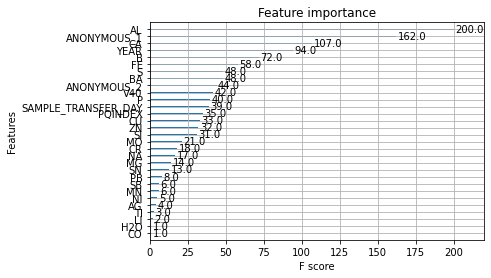

In [10]:
plot_importance(model)

In [6]:
# Xgboost 회귀분석 모델 GridCV로 최적 파리미터 탐색
xgb_reg = XGBRegressor()
parameters = {'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.4, 0.6,0.8],
              'colsample_bytree': [0.2, 0.6, 0.8],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 3
                        )
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train[test_stage_features], y_reg, test_size=0.2)
xgb_grid.fit(x_train2,y_train2)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [7]:
# 최적 파라미터 출력
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'colsample_bytree': 0.6, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.8}
0.06864817120310485


In [8]:
# 최적 파라미터로 회귀분석에 학습 
model_reg = XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.03, max_depth= 5, min_child_weight= 4, n_estimators= 500, nthread= 4, subsample= 0.8)
model_reg.fit(x_train2, y_train2, early_stopping_rounds=30, eval_metric='rmse', eval_set = [(x_test2, y_test2)])

[0]	validation_0-rmse:0.44922
[1]	validation_0-rmse:0.43835
[2]	validation_0-rmse:0.42789
[3]	validation_0-rmse:0.41770
[4]	validation_0-rmse:0.40803
[5]	validation_0-rmse:0.39859
[6]	validation_0-rmse:0.38959
[7]	validation_0-rmse:0.38101
[8]	validation_0-rmse:0.37257
[9]	validation_0-rmse:0.36458
[10]	validation_0-rmse:0.35692
[11]	validation_0-rmse:0.34939
[12]	validation_0-rmse:0.34231
[13]	validation_0-rmse:0.33544
[14]	validation_0-rmse:0.32879
[15]	validation_0-rmse:0.32254
[16]	validation_0-rmse:0.31643
[17]	validation_0-rmse:0.31047
[18]	validation_0-rmse:0.30491
[19]	validation_0-rmse:0.29957
[20]	validation_0-rmse:0.29445
[21]	validation_0-rmse:0.28947
[22]	validation_0-rmse:0.28478
[23]	validation_0-rmse:0.28027
[24]	validation_0-rmse:0.27612
[25]	validation_0-rmse:0.27214
[26]	validation_0-rmse:0.26829
[27]	validation_0-rmse:0.26450
[28]	validation_0-rmse:0.26099
[29]	validation_0-rmse:0.25754
[30]	validation_0-rmse:0.25425
[31]	validation_0-rmse:0.25119
[32]	validation_0-

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.24014
[36]	validation_0-rmse:0.23778
[37]	validation_0-rmse:0.23547
[38]	validation_0-rmse:0.23330
[39]	validation_0-rmse:0.23123
[40]	validation_0-rmse:0.22929
[41]	validation_0-rmse:0.22750
[42]	validation_0-rmse:0.22571
[43]	validation_0-rmse:0.22407
[44]	validation_0-rmse:0.22254
[45]	validation_0-rmse:0.22096
[46]	validation_0-rmse:0.21955
[47]	validation_0-rmse:0.21821
[48]	validation_0-rmse:0.21694
[49]	validation_0-rmse:0.21566
[50]	validation_0-rmse:0.21454
[51]	validation_0-rmse:0.21348
[52]	validation_0-rmse:0.21251
[53]	validation_0-rmse:0.21157
[54]	validation_0-rmse:0.21068
[55]	validation_0-rmse:0.20980
[56]	validation_0-rmse:0.20902
[57]	validation_0-rmse:0.20822
[58]	validation_0-rmse:0.20744
[59]	validation_0-rmse:0.20672
[60]	validation_0-rmse:0.20608
[61]	validation_0-rmse:0.20555
[62]	validation_0-rmse:0.20496
[63]	validation_0-rmse:0.20445
[64]	validation_0-rmse:0.20393
[65]	validation_0-rmse:0.20343
[66]	validation_0-rmse:0.20297
[67]	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

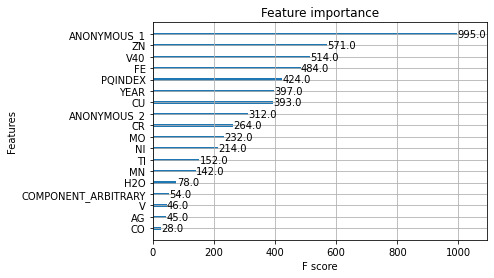

In [9]:
plot_importance(model_reg)

In [11]:
# 모델에 test데이터 적용

y_hat = model_reg.predict(df_test)

y_hat = pd.DataFrame(y_hat)
y_hat

,0
0,0.051543
1,0.087613
2,0.124775
3,0.082955
4,0.174782
...,...
6036,0.034779
6037,0.064419
6038,0.104321
6039,0.073150


In [12]:
submit = pd.read_csv("src/data/test.csv")
submit['Y_LABEL'] = y_hat

final_submit = pd.DataFrame()
final_submit['ID'] = submit['ID']
final_submit['Y_LABEL'] = y_hat


def get_reg(v):
  if v >= 0.5:
    score = 1
  else:
    score = 0
  return score

final_submit['Y_LABEL'] = final_submit['Y_LABEL'].apply(lambda v: get_reg(v))
final_submit

final_submit.to_csv('src/data/submit4.csv', index=False)